# Project BINF-F402
## Group 2

Daan Vandenberge, daan.vandenberge@ulb.be, 000577772

Karolien Heymans, karolien.heymans@ulb.be, 000577754

Fien Strijthaegen, fien.strijthaegen@ulb.be, 000532187



In [1]:
library(xtable)
library(dplyr)
library("DESeq2")
library(ggplot2)
library(biomaRt)
library(fgsea)

Warning message:
"package 'xtable' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
 

## Clinical data

In [3]:
clinical_data = read.delim(file='clinical-data.tsv',sep ='\t',header=TRUE,row.names=1)# load in data with the read.delim 

In [4]:
Age = clinical_data$AGE
BMI = clinical_data$BMI
Cohort = clinical_data$COHORT
Hardy_scale = clinical_data$DTHHRDY
Heigth = clinical_data$HGHT
Ischemic_Time = clinical_data$TRISCHD
Sex = clinical_data$SEX
Weigth = clinical_data$WGHT
# every variable is assigned individually for easier work

all variables have been assigned to a vector. Next, the data is checked of there are any NA values in the clinical data.

In [5]:
any(is.na(Age))
any(is.na(BMI))
any(is.na(Cohort))
any(is.na(Hardy_scale))
any(is.na(Heigth))
any(is.na(Ischemic_Time))
any(is.na(Sex))
any(is.na(Weigth))
# this is done with the any function

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

every variable has no empty value

## Q1: explore clinical variables

Firstly, histogram plots are created to see how each variable is distributed in the clinical data

In [8]:
length(Sex == 2)

[1] 142

All 142 samples have sex 2 (female)

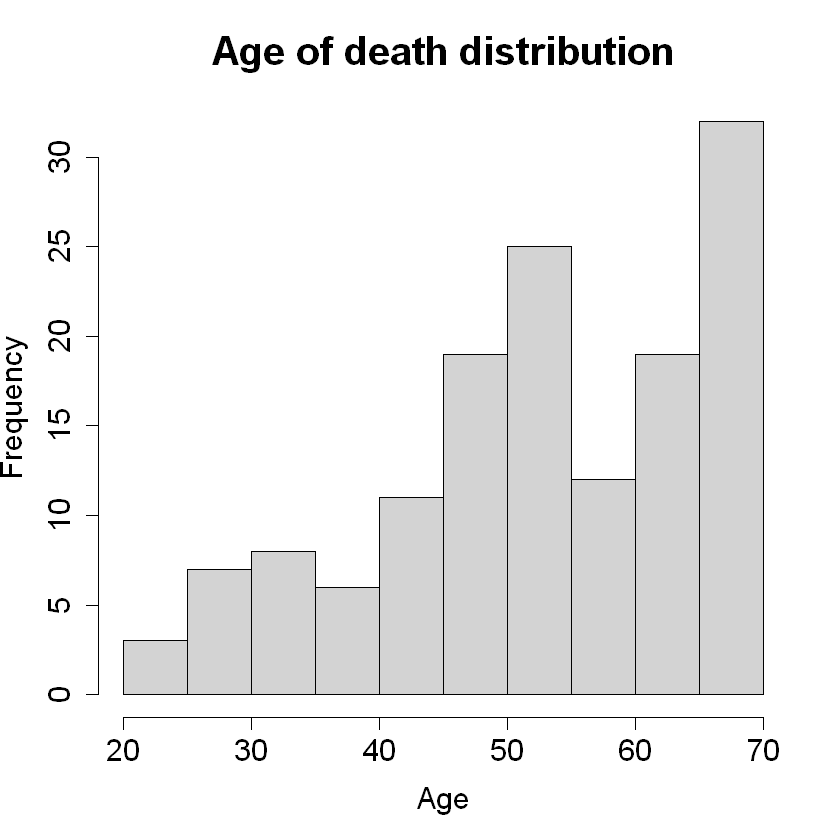

In [4]:
hist(Age, main = "Age of death distribution", xlab = "Age", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)
#this is done with the hist function 


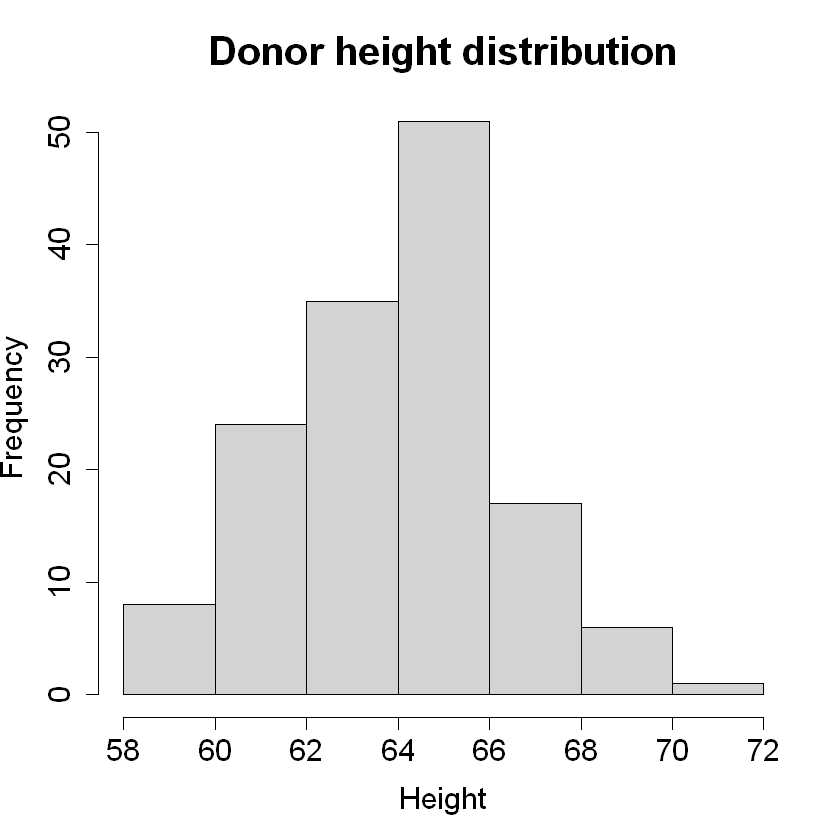

In [5]:
hist(Heigth, main = "Donor height distribution", xlab = "Height", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

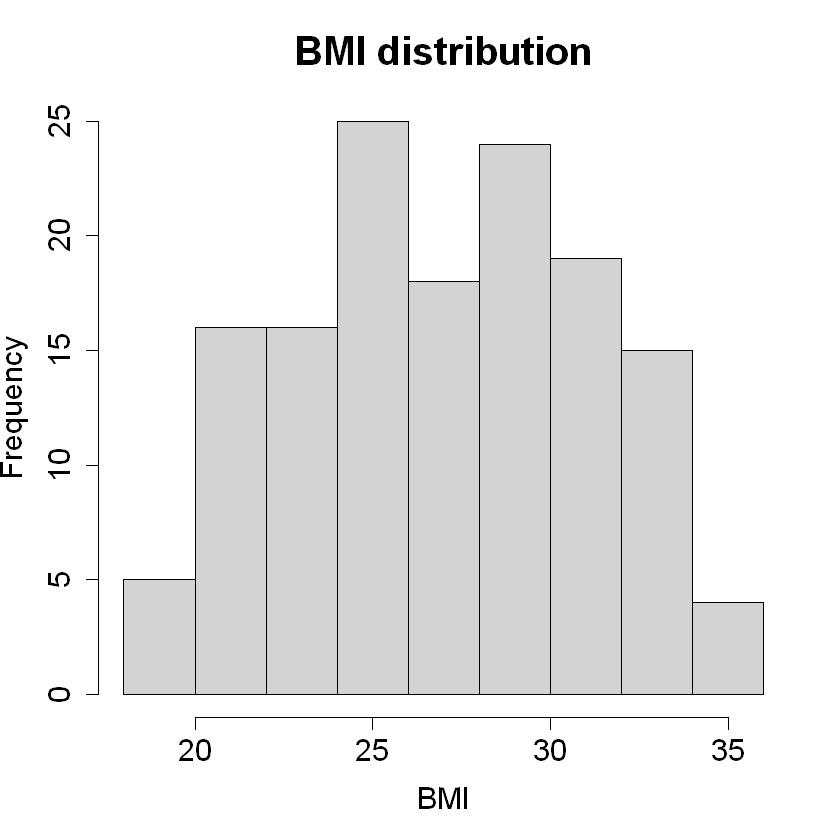

In [6]:
hist(BMI, main = "BMI distribution", xlab = "BMI", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

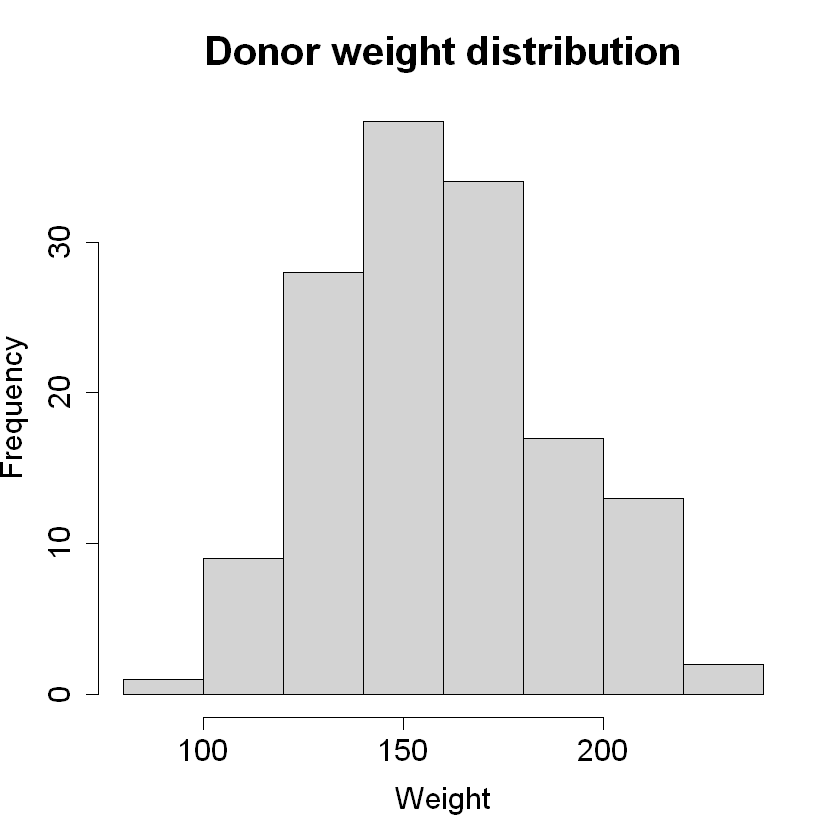

In [7]:
hist(Weigth, main = "Donor weight distribution", xlab = "Weight", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

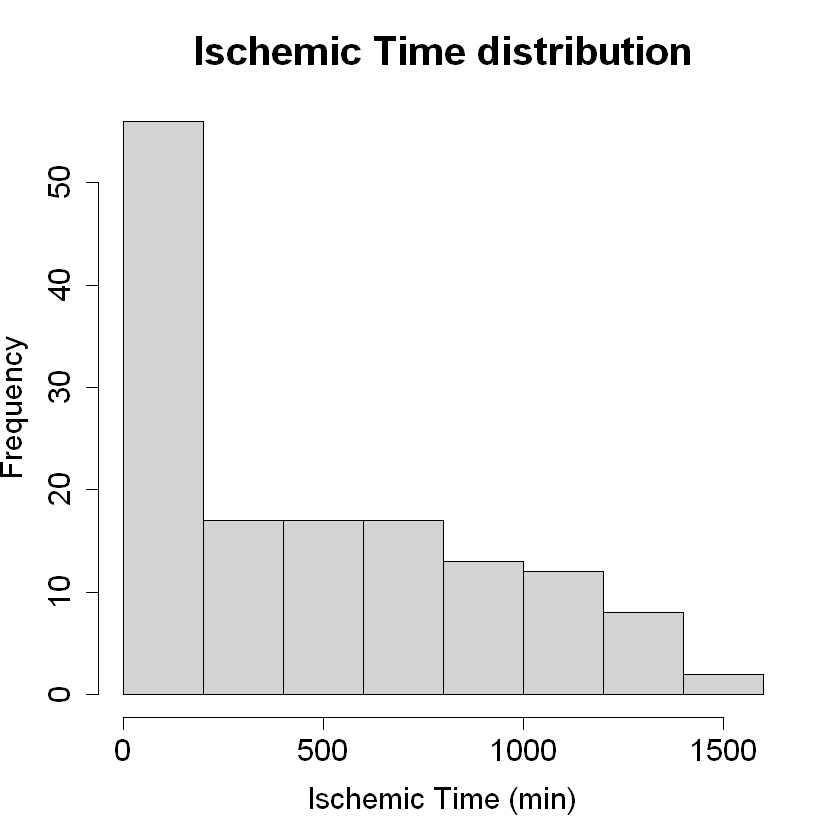

In [8]:
hist(Ischemic_Time,  main = "Ischemic Time distribution", xlab = "Ischemic Time (min)", ylab = "Frequency", cex.main = 2, cex.lab = 1.5, cex.axis = 1.5)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


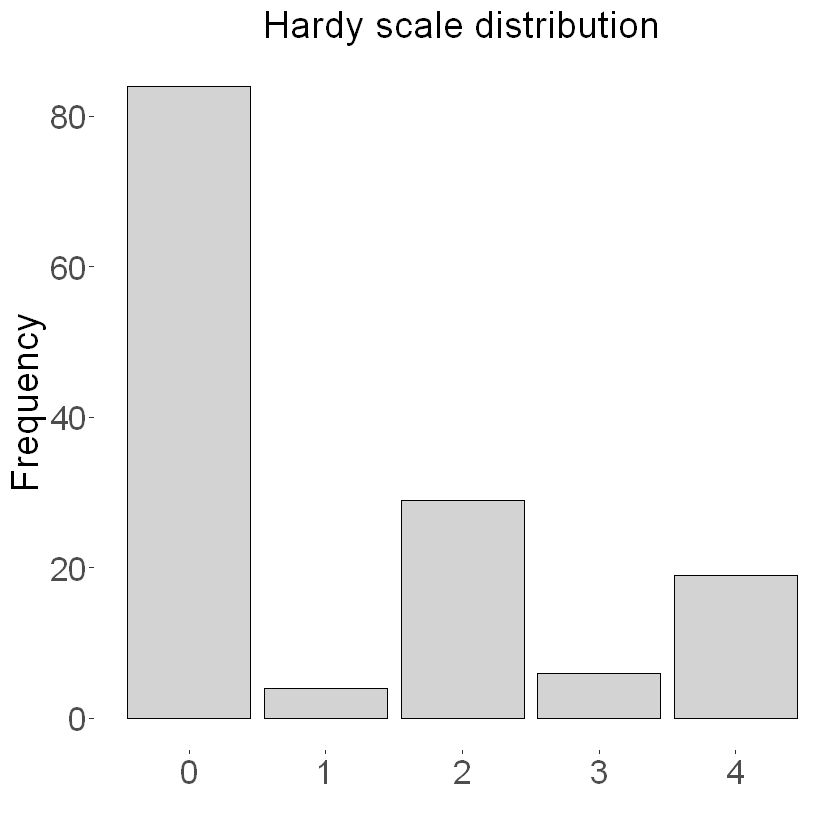

In [12]:
library(ggplot2)
       
ggplot(data = clinical_data, aes(x = DTHHRDY)) +
  geom_bar(fill = "lightgrey", color = "black", size = 0.3) +
  labs(title = "Hardy scale distribution", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 23),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        panel.background = element_rect(fill = "white"))# for the distribution of hardy scale, we use the ggplot2 library

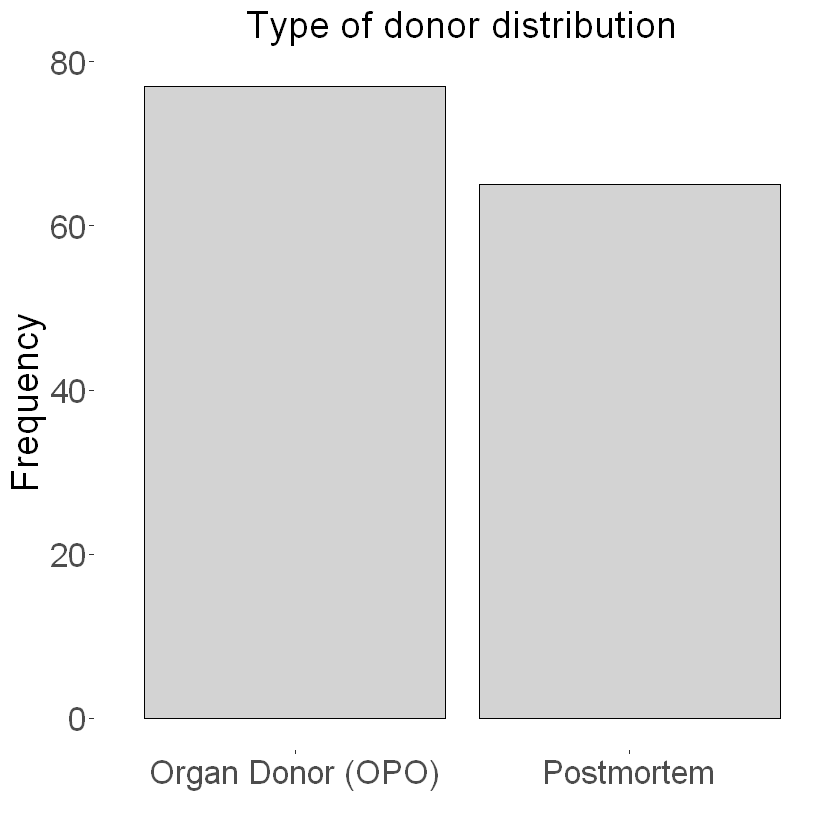

In [13]:
ggplot(data = clinical_data, aes(x = COHORT)) +
  geom_bar(fill = "lightgrey",color = "black", size = 0.3) +
  labs(title = "Type of donor distribution", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 23),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        panel.background = element_rect(fill = "white"))#for the distribution of the donor type, we also used the ggpolt2 library
        


Next, the Shapiro-Wilik test was perfomed to test the normallity of the data for that variable

In [ ]:
shapiro.test(Age)


	Shapiro-Wilk normality test

data:  Age
W = 0.93931, p-value = 8.064e-06


In [ ]:
shapiro.test(BMI)


	Shapiro-Wilk normality test

data:  BMI
W = 0.97479, p-value = 0.009984


In [ ]:
shapiro.test(Hardy_scale)


	Shapiro-Wilk normality test

data:  Hardy_scale
W = 0.71614, p-value = 3.095e-15


In [ ]:
shapiro.test(Heigth)


	Shapiro-Wilk normality test

data:  Heigth
W = 0.98064, p-value = 0.04182


In [ ]:
shapiro.test(Ischemic_Time)



	Shapiro-Wilk normality test

data:  Ischemic_Time
W = 0.88707, p-value = 5.442e-09


In [14]:
OPO = subset(clinical_data, COHORT == "Organ Donor (OPO)")
POST = subset(clinical_data, COHORT == "Postmortem")

all x values are identical

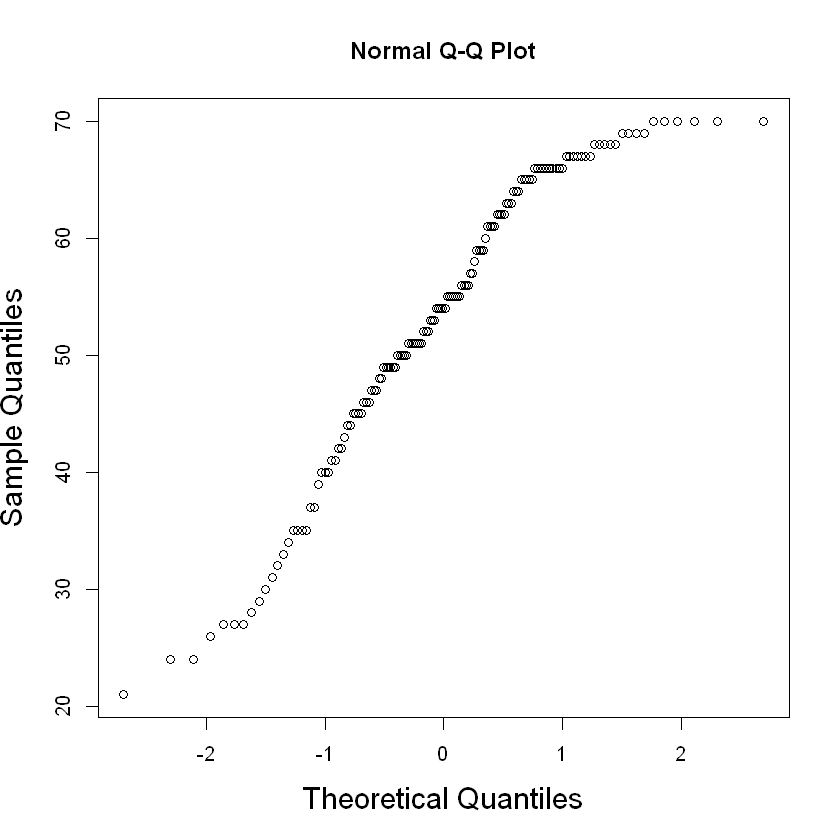

In [23]:
par(cex.lab = 1.5)  # Adjust the value as per your desired font size
qqnorm(Age)


## 1.2 Correlation of the clinical variables

The correlation can only be analyzed between the numerical clinical variables.

In [16]:
numerical_data <- clinical_data[, c("AGE", "HGHT", "WGHT", "BMI", "TRISCHD")]

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(ggplot2)

corrplot 0.92 loaded



In [17]:
correlation_matrix = cor(numerical_data, method = "spearman")
print(correlation_matrix)

                 AGE        HGHT        WGHT          BMI     TRISCHD
AGE      1.000000000 -0.03946346 -0.01047059  0.001525525  0.18672364
HGHT    -0.039463456  1.00000000  0.48052359  0.124056430  0.13886352
WGHT    -0.010470591  0.48052359  1.00000000  0.916885941  0.04901136
BMI      0.001525525  0.12405643  0.91688594  1.000000000 -0.03367039
TRISCHD  0.186723639  0.13886352  0.04901136 -0.033670390  1.00000000


The pairs() function is used to create a matrix of scatter plots for the numerical data.

now, we are going to perform the pearson correlatin test , to test the significance of the correlations

In [ ]:
cor.test(BMI, Weigth, method = "pearson")


	Pearson's product-moment correlation

data:  BMI and Weigth
t = 25.739, df = 140, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8748014 0.9335925
sample estimates:
      cor 
0.9085966 


In [ ]:
cor.test(Ischemic_Time, Age, method = "pearson")


	Pearson's product-moment correlation

data:  Ischemic_Time and Age
t = 2.2965, df = 140, p-value = 0.02313
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02664188 0.34444936
sample estimates:
     cor 
0.190533 


In [ ]:
cor.test(Weigth, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  Weigth and Heigth
t = 7.1444, df = 140, p-value = 4.536e-11
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3849394 0.6281347
sample estimates:
      cor 
0.5168906 


In [ ]:
cor.test(Ischemic_Time, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  Ischemic_Time and Heigth
t = 1.9277, df = 140, p-value = 0.05592
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.004036589  0.317124953
sample estimates:
      cor 
0.1607976 


In [ ]:
cor.test(BMI, Heigth, method = "pearson")


	Pearson's product-moment correlation

data:  BMI and Heigth
t = 1.414, df = 140, p-value = 0.1596
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0469886  0.2779515
sample estimates:
      cor 
0.1186571 


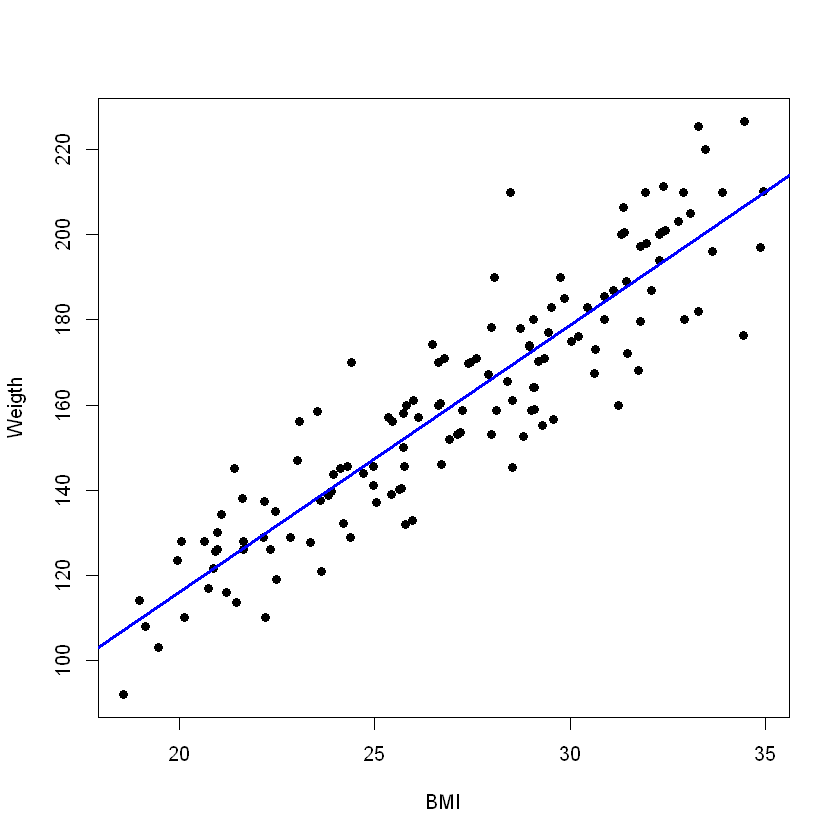

In [24]:
plot(BMI, Weigth, pch = 16)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)

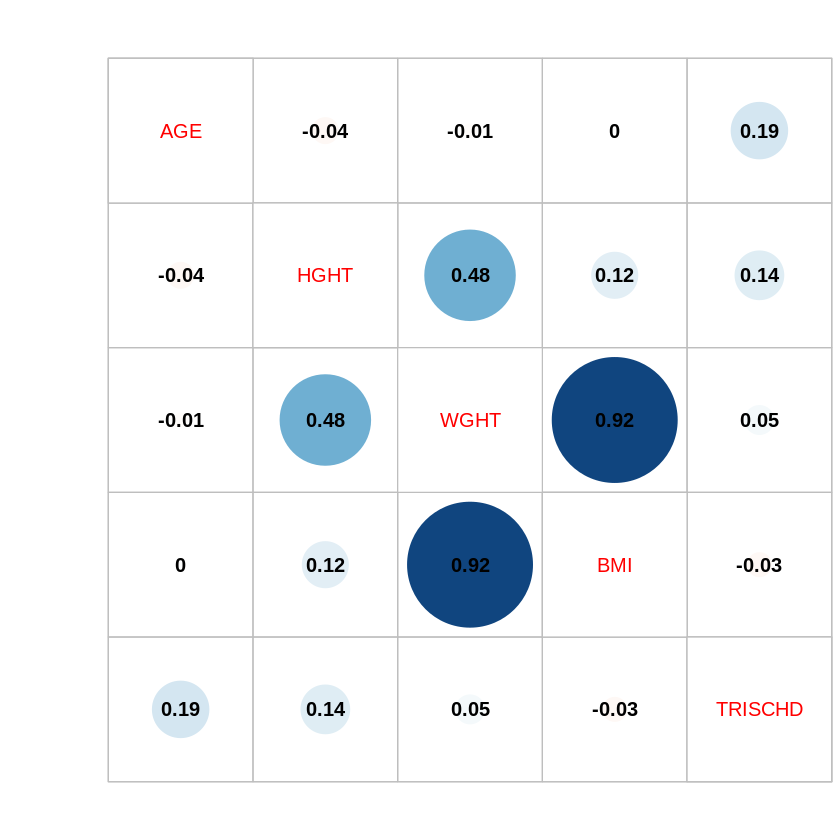

In [ ]:
#correlogram
corrplot(correlation_matrix, addCoef.col = 'black', tl.pos = 'd',
         cl.pos = 'n', col = COL2())

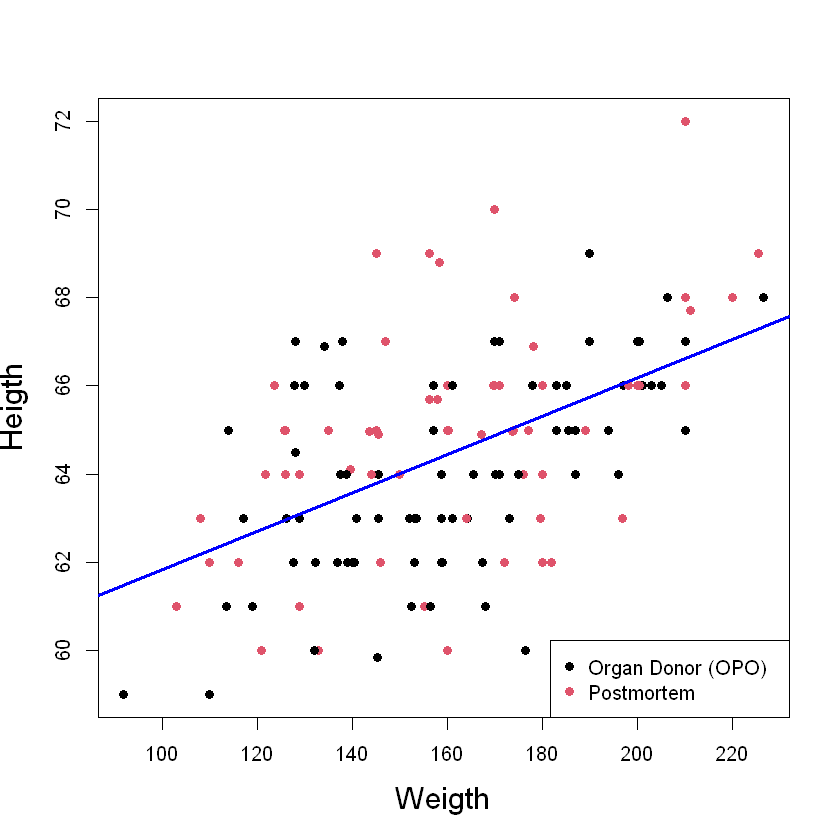

In [47]:
plot(Weigth, Heigth, pch = 16, col=factor(Cohort), cex.lab = 1.5)
abline(lm(Heigth ~ Weigth), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

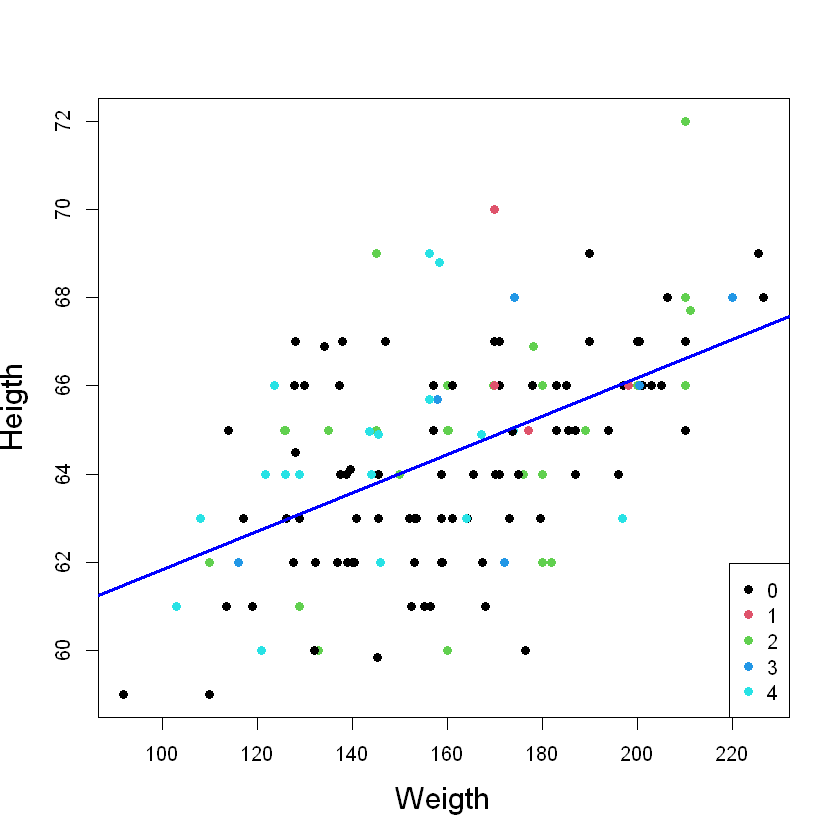

In [46]:
plot(Weigth, Heigth, pch = 16, col=factor(Hardy_scale), cex.lab = 1.5)
abline(lm(Heigth ~ Weigth), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))
par(cex.lab = 10, cex.axis = 10)

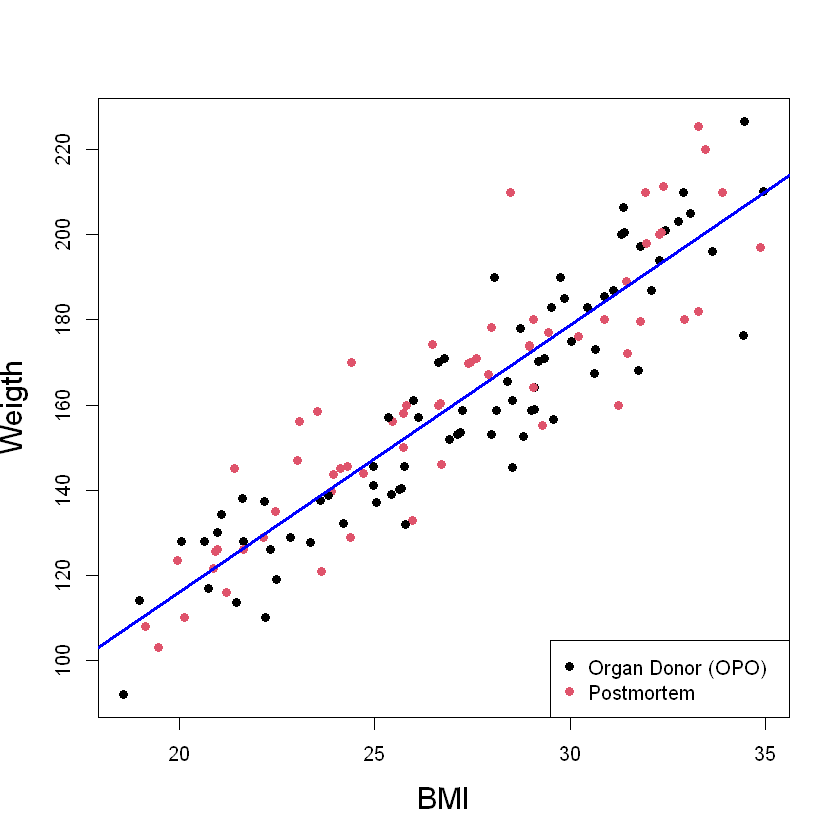

In [45]:
plot(BMI, Weigth, pch = 16, col=factor(Cohort), cex.lab = 1.5)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

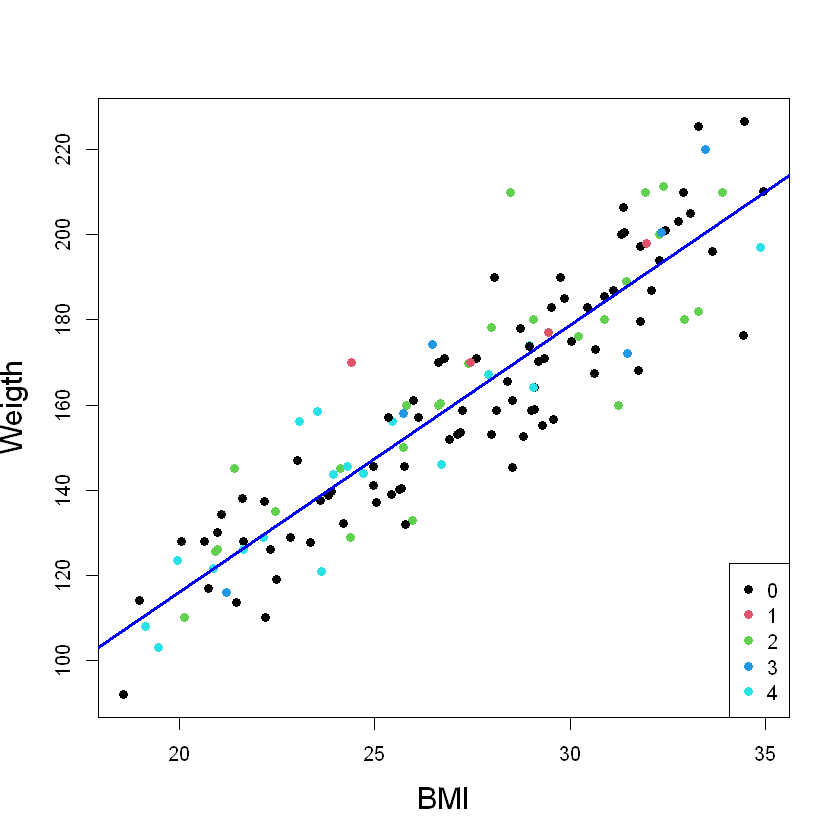

In [44]:
plot(BMI, Weigth, pch = 16, col=factor(Hardy_scale),cex.lab = 1.5)
abline(lm(Weigth ~ BMI), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))
par(cex.lab = 10, cex.axis = 10)

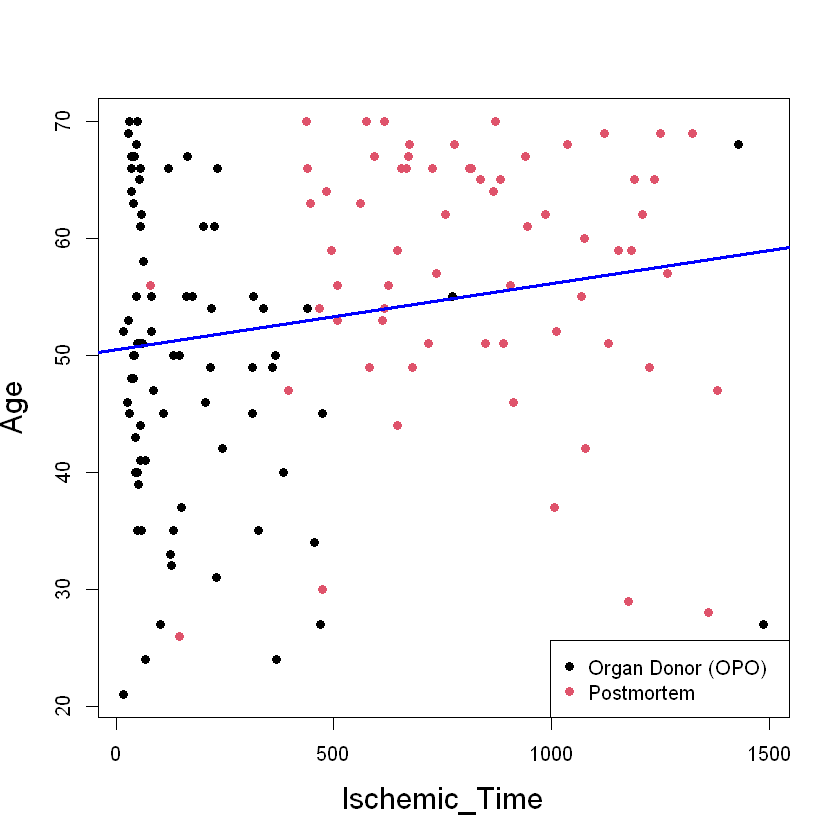

In [39]:
plot(Ischemic_Time, Age, pch = 16, col=factor(Cohort),cex.lab = 1.5)
abline(lm(Age ~ Ischemic_Time), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Cohort)),
       pch = 19,
       col = factor(levels(factor(Cohort))))
par(cex.lab = 10, cex.axis = 10)

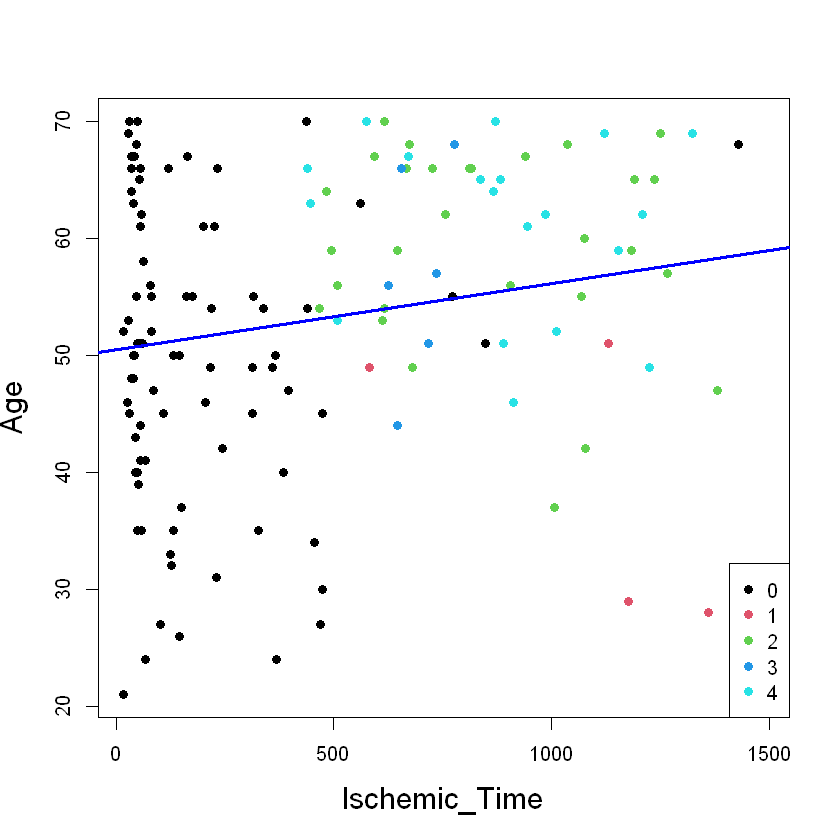

In [37]:
plot(Ischemic_Time, Age, pch = 16, col=factor(Hardy_scale),cex.lab = 1.5)
abline(lm(Age ~ Ischemic_Time), col = "blue", lwd = 3)
legend("bottomright",
       legend = levels(factor(Hardy_scale)),
       pch = 19,
       col = factor(levels(factor(Hardy_scale))))
par(cex.lab = 10, cex.axis = 10)

In [49]:
compare_table = table(as.factor(Cohort),as.factor(Hardy_scale))
print(compare_table)


                   
                     0  1  2  3  4
  Organ Donor (OPO) 77  0  0  0  0
  Postmortem         7  4 29  6 19


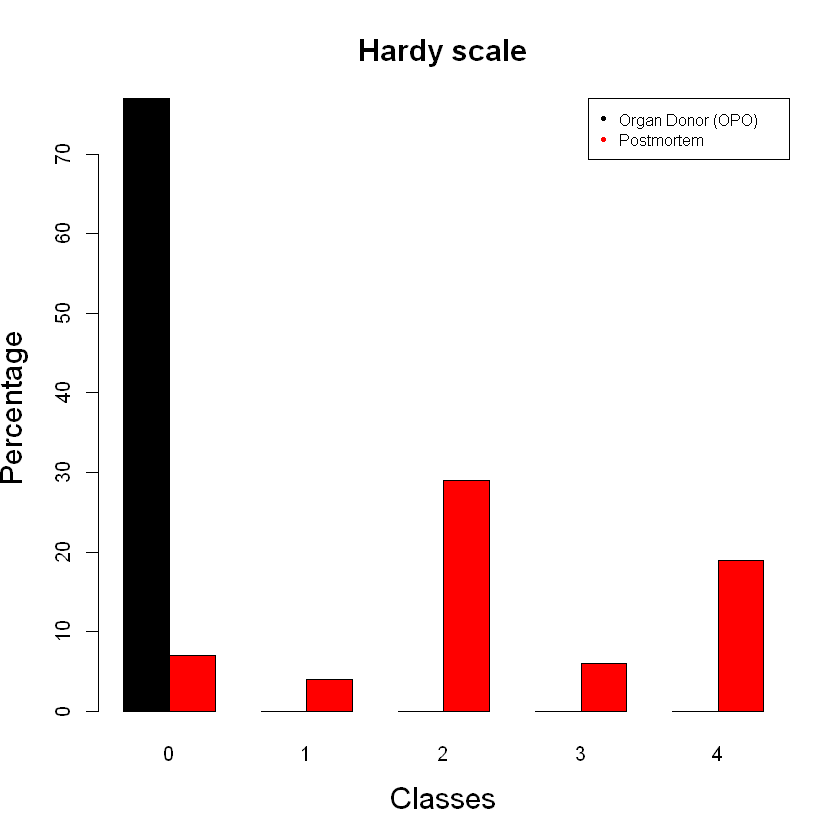

In [52]:

barplot(compare_table,
        col=c("black","red"),beside=TRUE)
title(main = "Hardy scale", cex.main = 1.5)  
title(xlab = "Classes", cex.lab = 1.5)     
title(ylab = "Percentage", cex.lab = 1.5)
legend("topright", legend=c("Organ Donor (OPO)", "Postmortem"),
       col=c("black", "red"), pch=20, cex=0.8)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


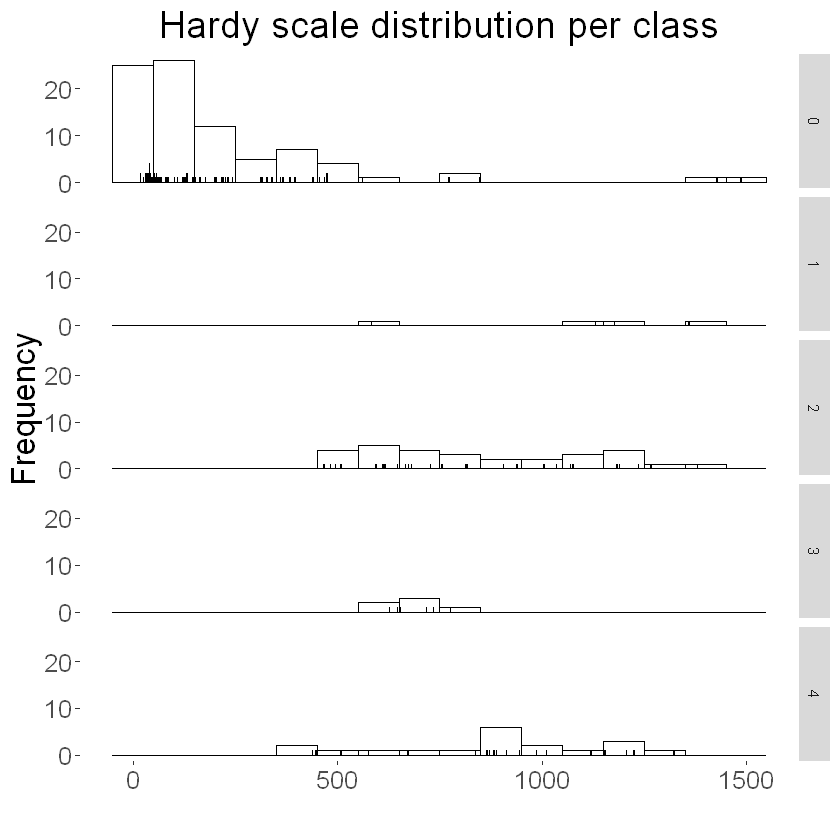

In [9]:
library(ggplot2)
ggplot(clinical_data, aes(x=TRISCHD)) +
  geom_histogram(fill="white", colour="black", binwidth=100) +
  facet_grid(DTHHRDY ~ .) +
  geom_bar(fill = "lightgrey", color = "black", size = 0.3) +
  labs(title = "Hardy scale distribution per class", x = "", y = "Frequency") +
  theme(plot.title = element_text(size = 23, hjust = 0.5),
        axis.title = element_text(size = 20),
        axis.text.x = element_text(size = 15),
        axis.text.y = element_text(size = 15),
        panel.background = element_rect(fill = "white"))



PCA analysis

Next , The PCA analysis was performed, using the prcomp function.First a subset of the data was created, that only contains the numerical elements

Importance of components:
                          PC1    PC2    PC3    PC4     PC5
Standard deviation     1.4502 1.1063 0.9805 0.8421 0.04849
Proportion of Variance 0.4206 0.2448 0.1923 0.1418 0.00047
Cumulative Proportion  0.4206 0.6654 0.8577 0.9995 1.00000

[1] 2.103098742 1.223966912 0.961392693 0.709190800 0.002350852
[1] 42.06197484 24.47933824 19.22785387 14.18381601  0.04701705


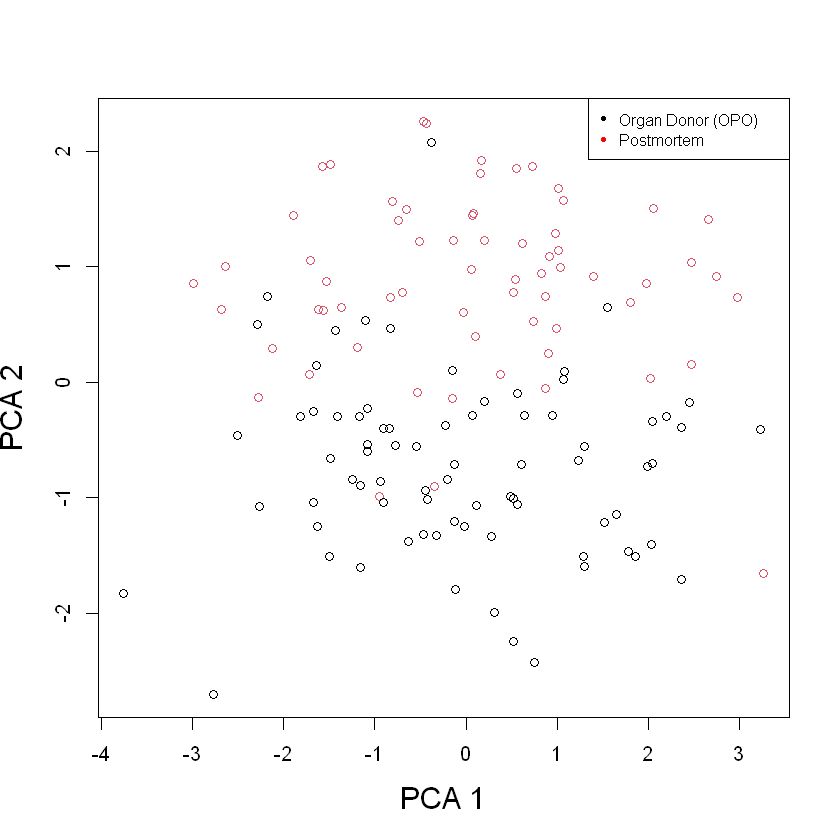

In [66]:
num_data = clinical_data[,c(2, 3, 4, 5, 8)]
PCA_data = scale(num_data)

PCA_analysis = prcomp(PCA_data, center = TRUE, scale. = TRUE)
summary(PCA_analysis)
plot(PCA_analysis$x[,1], PCA_analysis$x[,2], xlab = "PCA 1", ylab = "PCA 2", col = factor(Cohort), cex.lab = 1.5) 
legend("topright", legend=c("Organ Donor (OPO)", "Postmortem"),
       col=c("black", "red"), pch=20, cex=0.8)

# Add the dots representing the observations to the biplot
#invisible(text(PCA_analysis$x[,1], PCA_analysis$x[,2], labels = ".", cex = 2))

# Add a legend for the arrows representing the variables



print(PCA_analysis$sdev^2)# print out the eigenvalues
print(PCA_analysis$sdev^2/sum(PCA_analysis$sdev^2)*100)#percentage of variance explained by the pca




The PCA graph was created using the 'factoextra package'

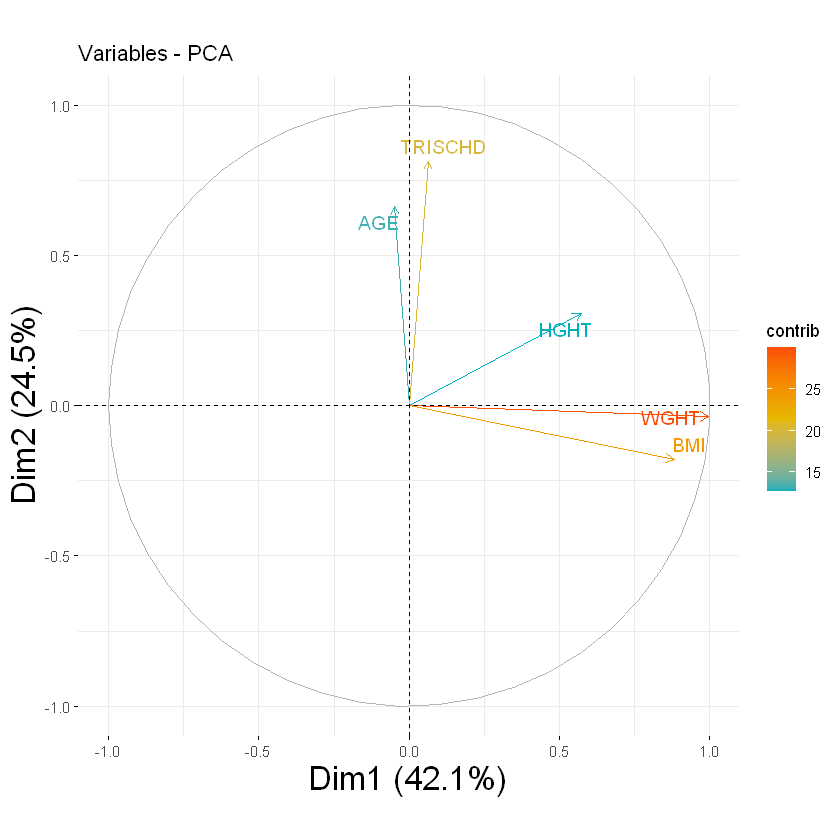

In [73]:
#install.packages("factoextra")
library(factoextra)
fviz_pca_var(PCA_analysis,col.var = "contrib", gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE) + 
  theme(axis.title = element_text(size = 20))


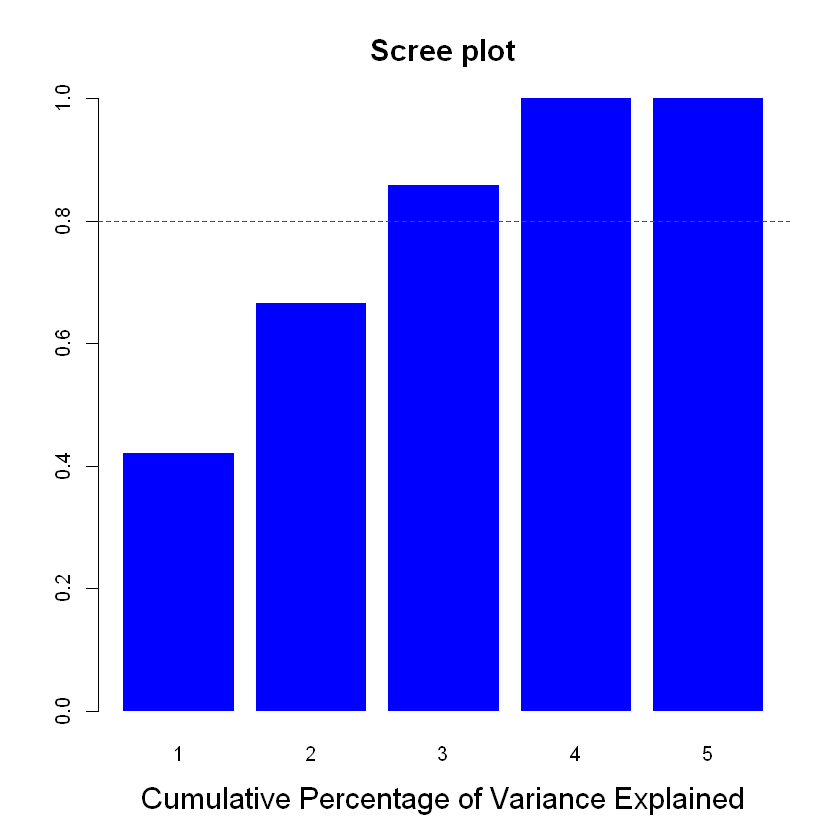

In [70]:
variances = PCA_analysis$sdev^2 / sum(PCA_analysis$sdev^2)
cum_variances = cumsum(variances)
barplot(cum_variances, main = "Scree plot", xlab = "Cumulative Percentage of Variance Explained", col = "blue", border = NA, names.arg = 1:length(cum_variances),cex.lab=1.5, cex.main=1.5)
abline(h = 0.8, lty = 2, col = "red")

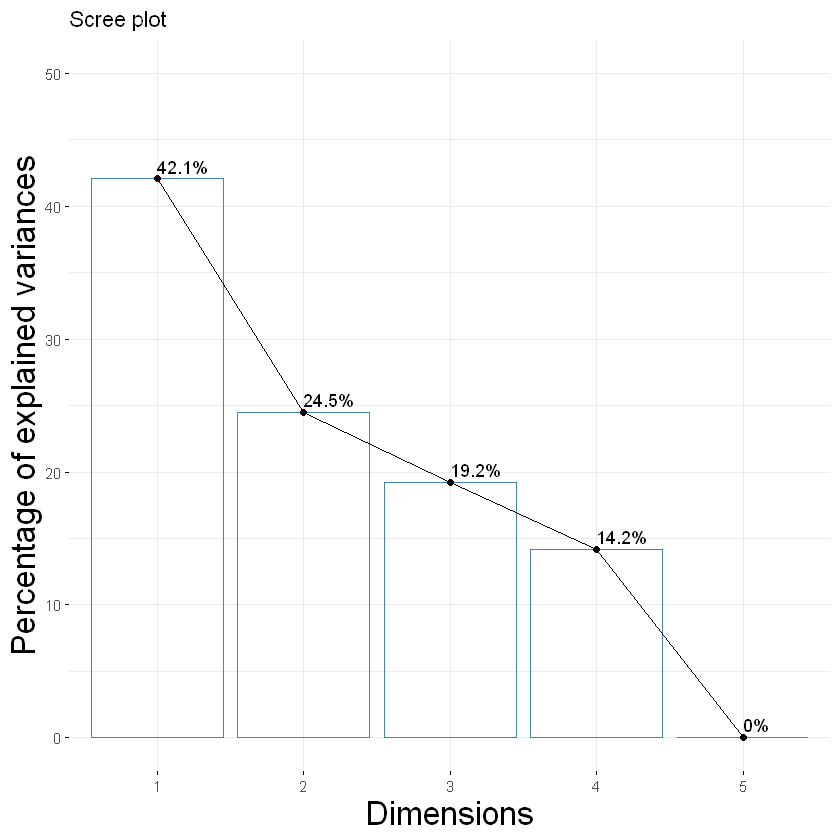

In [72]:
#prop_var = 100 * PCA_analysis$sdev^2 / sum(PCA_analysis$sdev^2)
#screeplot(PCA_analysis, type = "l", main = "Scree Plot", ylim = c(0, 60), 
          #ylab = "Percentage of variance explained", axes = FALSE)
#axis(2, at = seq(0, 60, by = 10), labels = seq(0, 60, by = 10))
#lines(prop_var, type = "b", pch = 19, col = "red")
fviz_eig(PCA_analysis, addlabels = TRUE, ylim = c(0, 50), barfill = cumsum(PCA_analysis$sdev^2)/sum(PCA_analysis$sdev^2)) + 
   theme(axis.title = element_text(size = 20)) 

In [74]:
head(PCA_data)

,AGE,HGHT,WGHT,BMI,TRISCHD
GTEX-1122O-0226,0.86772570,0.64160652,1.49574031,1.3791798,-1.0406059
GTEX-1128S-0126,1.02733328,0.64160652,-0.00743612,-0.2927816,0.8214603
GTEX-113JC-0126,-0.01011597,1.01578428,0.62879204,0.2300075,0.3326977
GTEX-11DXX-0226,1.02733328,0.01797693,-1.12607905,-1.3022222,-0.9905375
GTEX-11EM3-0126,-2.56383722,-2.26866492,-1.75531569,-1.1624906,-1.0811374
GTEX-11EMC-0226,1.02733328,-1.02140573,-1.75531569,-1.6660063,0.4638291


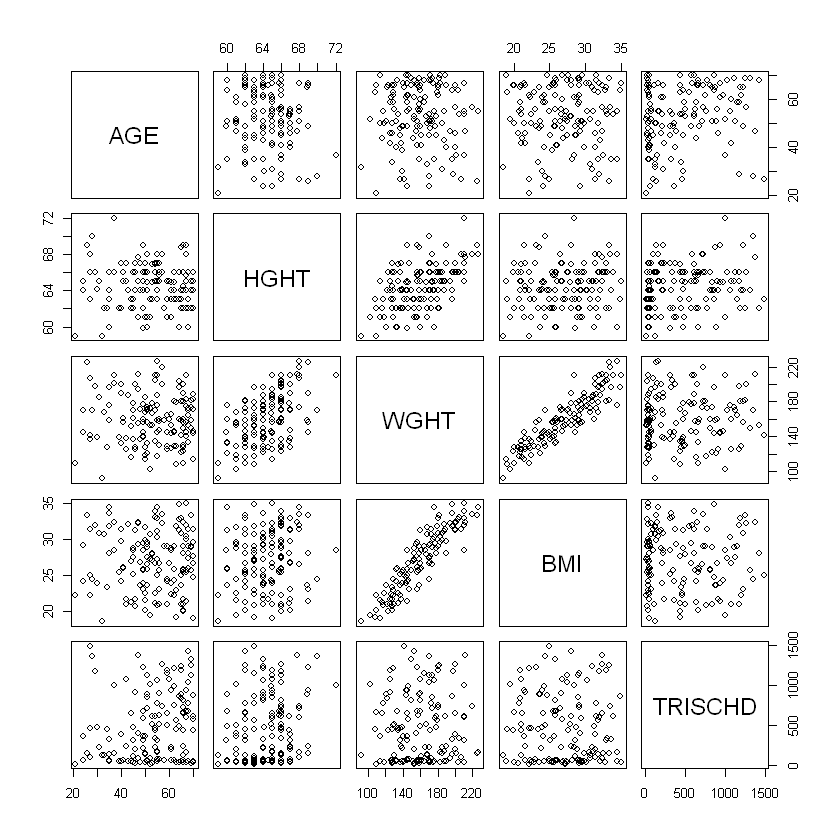

In [75]:
pairs(numerical_data)

## Q2 Morphology vs clinical variables

In [2]:
#load data
clinical_data = read.delim(file='clinical-data.tsv',sep ='\t',header=TRUE,row.names=1)
#set categorical variables to factors
clinical_data$DTHHRDY <- as.factor(clinical_data$DTHHRDY)
clinical_data$COHORT <- as.factor(substr(clinical_data$COHORT,1,1))
#We normalize the numerical variables
clinical_data$AGE <- scale(clinical_data$AGE)
clinical_data$HGHT <- scale(clinical_data$HGHT)
clinical_data$WGHT <- scale(clinical_data$WGHT)
clinical_data$BMI <- scale(clinical_data$BMI)
clinical_data$TRISCHD <- scale(clinical_data$TRISCHD)
head(clinical_data)

,SEX,AGE,HGHT,WGHT,BMI,SMPTHNTS,COHORT,TRISCHD,DTHHRDY,SUBJID,IMGURL
,<int>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>",<chr>,<fct>,"<dbl[,1]>",<fct>,<chr>,<chr>
GTEX-1122O-0226,2,0.86772570,0.64160652,1.49574031,1.3791798,"2 pieces, some nodular change",O,-1.0406059,0,GTEX.1122O,https://brd.nci.nih.gov/brd/specimen/GTEX-1122O-0226
GTEX-1128S-0126,2,1.02733328,0.64160652,-0.00743612,-0.2927816,"2 pieces, no abnormalities noted",P,0.8214603,2,GTEX.1128S,https://brd.nci.nih.gov/brd/specimen/GTEX-1128S-0126
GTEX-113JC-0126,2,-0.01011597,1.01578428,0.62879204,0.2300075,2 pieces,P,0.3326977,2,GTEX.113JC,https://brd.nci.nih.gov/brd/specimen/GTEX-113JC-0126
GTEX-11DXX-0226,2,1.02733328,0.01797693,-1.12607905,-1.3022222,"2 pieces, some fibrosis",O,-0.9905375,0,GTEX.11DXX,https://brd.nci.nih.gov/brd/specimen/GTEX-11DXX-0226
GTEX-11EM3-0126,2,-2.56383722,-2.26866492,-1.75531569,-1.1624906,"2 pieces, small attachment of fibrofatty tissue",O,-1.0811374,0,GTEX.11EM3,https://brd.nci.nih.gov/brd/specimen/GTEX-11EM3-0126
GTEX-11EMC-0226,2,1.02733328,-1.02140573,-1.75531569,-1.6660063,"2 pieces, no significant findings",P,0.4638291,2,GTEX.11EMC,https://brd.nci.nih.gov/brd/specimen/GTEX-11EMC-0226


In [3]:
morph_counts = t(read.delim(file='morphological-counts.tsv', sep='\t', header=TRUE, row.names=1))
#Take out "Morphological.cluster" from column names for brevity's sake
row.names(morph_counts) = gsub("Mophological.cluster.", "", row.names(morph_counts))
head(morph_counts)

,GTEX-1122O-0226,GTEX-1128S-0126,GTEX-113JC-0126,GTEX-11DXX-0226,GTEX-11EM3-0126,GTEX-11EMC-0226,GTEX-11GSP-0126,GTEX-11I78-0526,GTEX-11P81-0126,GTEX-11TTK-0826,⋯,GTEX-1PBJI-0726,GTEX-1QCLZ-0626,GTEX-1QEPI-0726,GTEX-1QP28-0626,GTEX-1QP67-0326,GTEX-1QPFJ-0626,GTEX-1R46S-0426,GTEX-1R9JW-0226,GTEX-1RDX4-0926,GTEX-1S5ZU-0726
0,171,198,175,79,20,24,60,49,86,211,⋯,90,24,57,17,242,10,240,28,304,134
1,133,60,95,52,22,35,680,23,189,277,⋯,194,13,35,89,172,26,71,35,221,203
2,105,131,73,144,107,161,369,113,40,87,⋯,177,126,166,135,15,54,101,186,235,11
3,235,345,160,20,74,50,0,92,52,261,⋯,262,16,44,41,126,18,279,3,412,251
4,13,261,48,30,49,233,10,23,10,84,⋯,449,51,260,68,11,19,81,33,131,7
5,399,332,163,177,589,84,9,178,53,27,⋯,31,197,23,238,106,313,501,114,196,8


Automatically runs DESeq2 differential "gene" expression analysis for the morphological clusters, generates interesting plots in function of var.

In [12]:
morph_analysis <- function(var, formula, categorical, confounding=FALSE) {
  
  #construct DESEQDataset object
  #we don't normalize the counts since deseq2 does not expect that: 
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#why-un-normalized-counts
  
  #dds holds the read counts. The design formula expresses the variables
  #which will be used in modeling, it is used to estimate the dispersion
  #and to estimate the log2 fold changes of the model
  
  #We will not be pre-filtering low count clusters since we are only working
  #with 64 clusters instead of hundreds or thousands of genes
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pre-filtering
  dds = DESeqDataSetFromMatrix(countData = morph_counts, 
                               colData = clinical_data,
                               design = formula)
  #Run DESeq function
  dds = DESeq(dds)
  res = results(dds)
  #summary of the differential morphology expression
  summary(res)
  
  #Plotting adjusted p-values for each morphological cluster
  #We will go with the default cutoff value 0.1 for padj
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#p-values-and-adjusted-p-values
  #The more dots below the line, the more clusters are significantly linked
  #to the chosen clinical/technical variable(s)
  plot(rownames(morph_counts),xlab = "mean of normalized counts", ylab = "log fold change", cex.lab = 1.5, res$padj)
  abline(h=0.1, col="red")
  
  #Normalized counts of cluster
  #Shows the log2 fold changes attributable to a given variable over the mean
  #of normalized counts for all the samples in the data set
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#ma-plot
  plotMA(res)
  
  #sort results by p-value
  res <- na.omit(res[order(res$padj),])
  
  #Save list of most significant clusters
  #cutoff: padj has to be smaller than 0.1
  sign_clusters = res[res$padj < 0.1,]
  if (confounding) {
      write.csv(sign_clusters, paste("Morph_plots/cluster_lists/lowest_padj_",var,"_confounding.csv",sep=""))
  } else {
      write.csv(sign_clusters, paste("Morph_plots/cluster_lists/lowest_padj_",var,".csv",sep=""))
  }
  print(sign_clusters)
  
  #Plot the counts of the clusters with the 10 lowest adjusted p-values, one plot per cluster
  #https://www.bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#plot-counts
  if (categorical) {
    clusters = rownames(head(res,10))
    for (cluster in clusters) {
      plotCounts(dds, gene=cluster, intgroup=var, main=paste("Cluster ",cluster,sep=""))
    }
  }
  
  #Volcano plot
  #Blue = padj < 0.1
  #Red = padj < 0.1 and fold change > 2
  #https://en.wikipedia.org/wiki/Volcano_plot_(statistics)
  par(mfrow=c(1,1))
  with(res, plot(log2FoldChange, -log10(pvalue), pch=19, main=paste("Volcano plot ", var,sep=""), cex.lab=1.5, xlim=c(-3,3)))
  with(subset(res, padj<.01 ), points(log2FoldChange, -log10(pvalue), pch=19, col="blue"))
  with(subset(res, padj<.01 & abs(log2FoldChange)>2), points(log2FoldChange, -log10(pvalue), pch=19, col="red"))
  legend(x="topright", 
         legend=c("Padj > 0.1", "Padj < 0.1", "Padh < 0.1 and log2FC > 2"),
         col=c("black", "blue", "red"),
         pch=19)
}

### Q2.1 - Clinical variables vs. morphology

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 16, 25%
LFC < 0 (down)     : 18, 28%
outliers [1]       : 1, 1.6%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



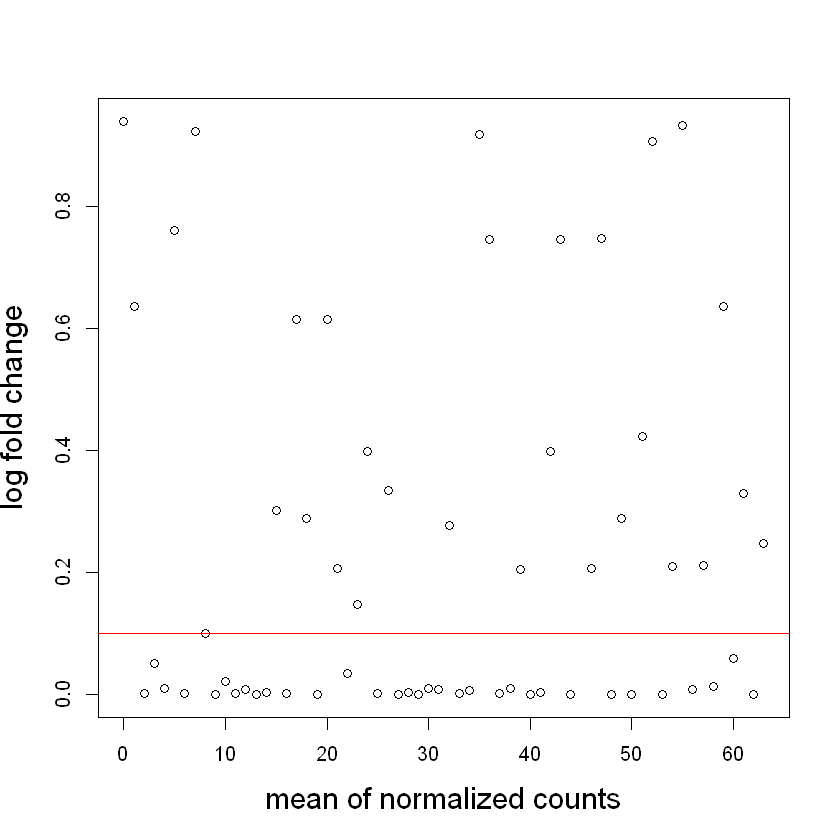

log2 fold change (MLE): AGE 
Wald test p-value: AGE 
DataFrame with 34 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
44   172.3732       0.498318 0.0899145   5.54214 2.98803e-08 1.88246e-06
40   182.7025       0.758142 0.1419872   5.33951 9.31968e-08 2.93570e-06
50   188.2888       0.714992 0.1368310   5.22537 1.73807e-07 3.64995e-06
53    92.9895      -0.503579 0.1022214  -4.92636 8.37761e-07 1.31947e-05
62   104.8641      -0.613830 0.1331761  -4.60916 4.04301e-06 5.09420e-05
...       ...            ...       ...       ...         ...         ...
10    93.3999      -0.322025  0.125270  -2.57066   0.0101505   0.0213161
22    31.5082      -0.385034  0.161389  -2.38575   0.0170445   0.0346388
3    110.1487      -0.252225  0.113446  -2.22331   0.0261949   0.0515712
60   156.7795       0.228430  0.105818   2.15871   0.0308723   0.0589380
8    121.9710       0.198494  0.10

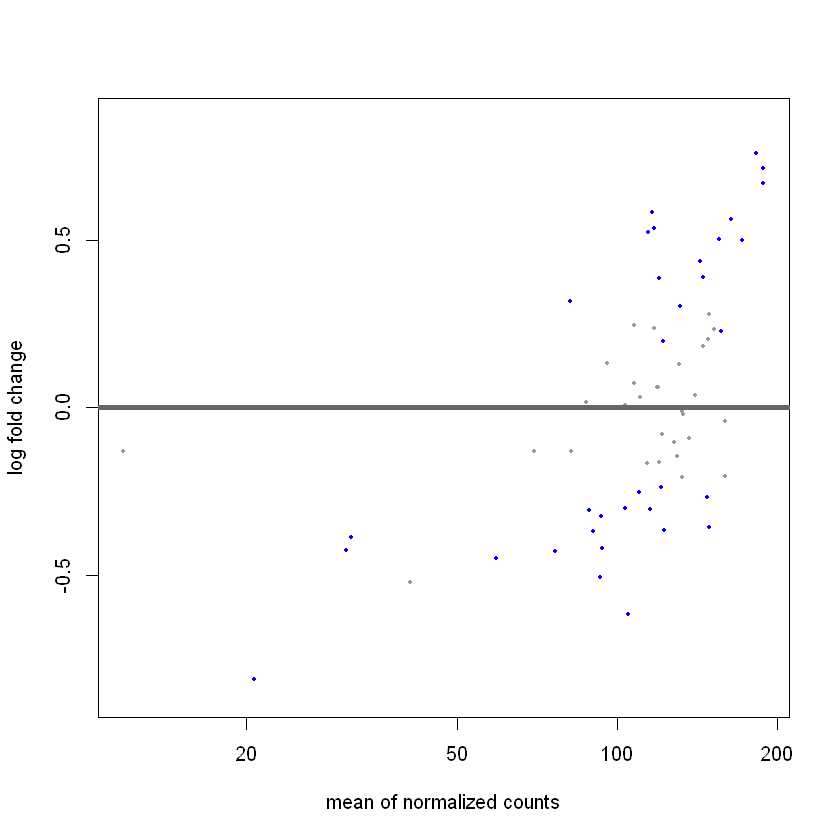

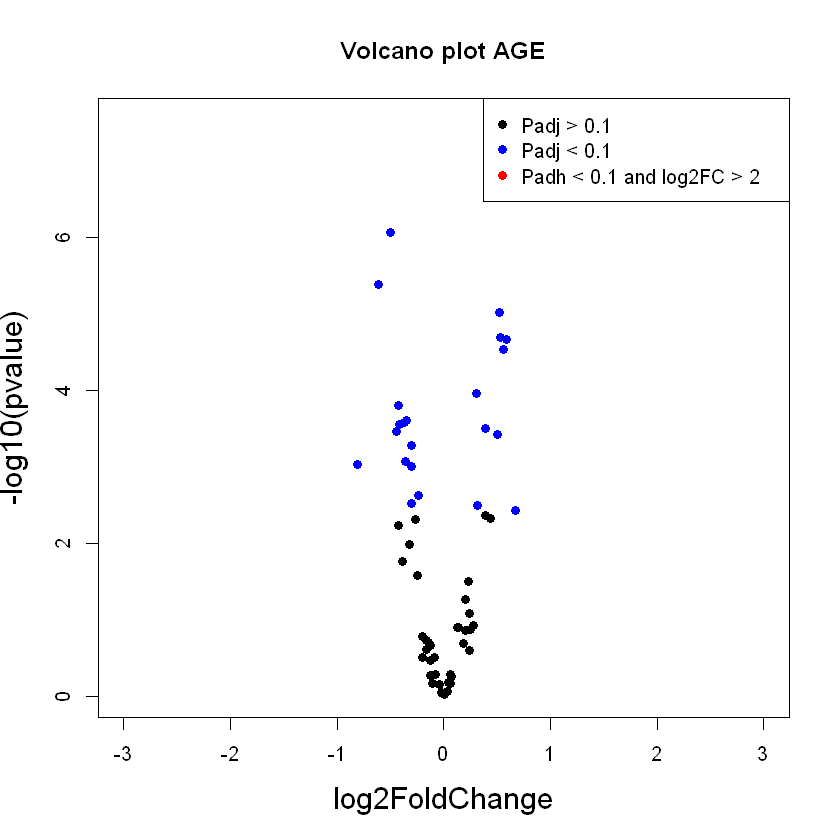

In [13]:
morph_analysis("AGE", ~ AGE, FALSE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 22, 34%
LFC < 0 (down)     : 7, 11%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



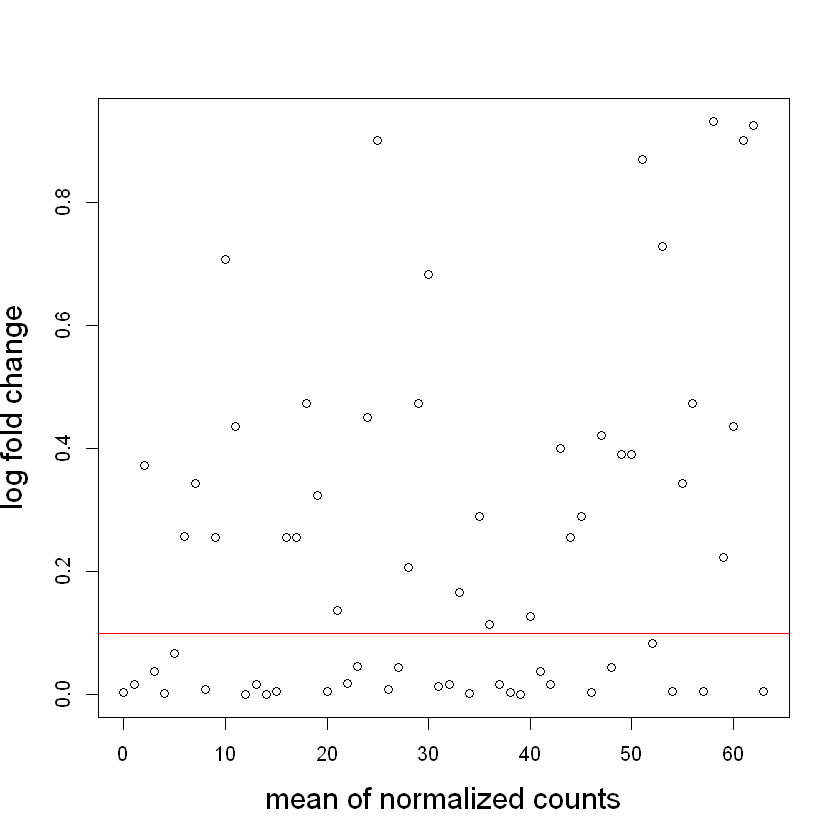

log2 fold change (MLE): HGHT 
Wald test p-value: HGHT 
DataFrame with 29 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
14    16.9777       1.332258 0.2283033   5.83547 5.36382e-09 3.43285e-07
39   149.2784       0.789708 0.1709141   4.62050 3.82823e-06 1.22503e-04
12   188.9150       0.977163 0.2232993   4.37602 1.20865e-05 2.57846e-04
4    143.5815       0.577931 0.1515637   3.81312 1.37224e-04 1.88049e-03
34   121.0148      -0.288979 0.0761225  -3.79623 1.46913e-04 1.88049e-03
...       ...            ...       ...       ...         ...         ...
27   163.8442      -0.326394  0.137668  -2.37087   0.0177461   0.0439845
48   116.5553       0.332471  0.140382   2.36833   0.0178687   0.0439845
23   152.3163      -0.315793  0.134825  -2.34224   0.0191682   0.0454357
5    159.5815      -0.226198  0.103603  -2.18331   0.0290131   0.0663158
52    87.5592      -0.318360  0.

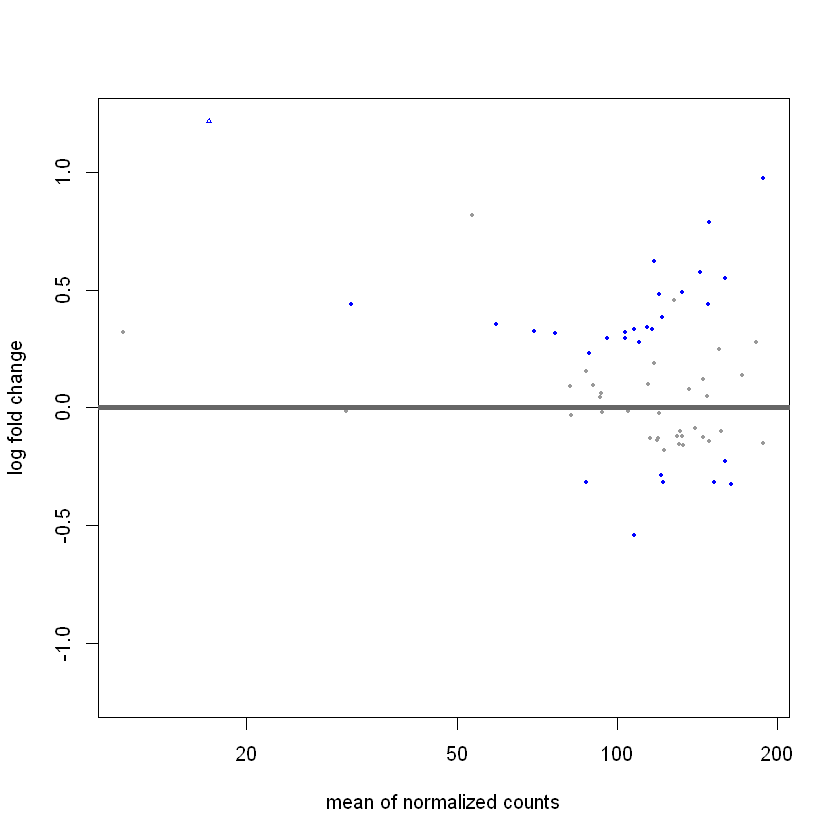

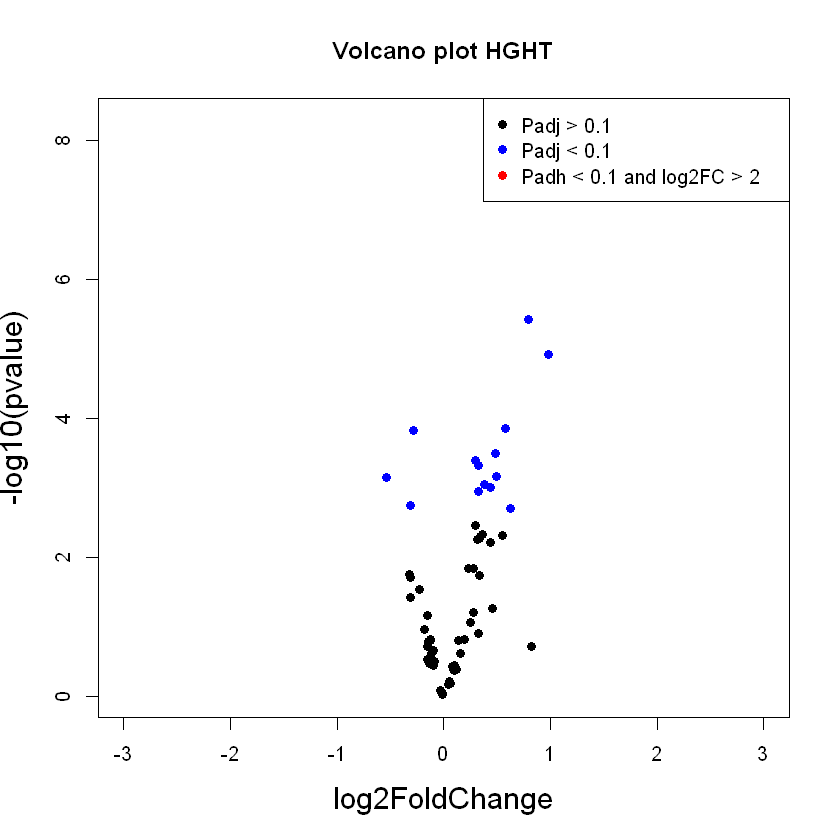

In [14]:
morph_analysis("HGHT", ~ HGHT, FALSE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 23, 36%
LFC < 0 (down)     : 6, 9.4%
outliers [1]       : 2, 3.1%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



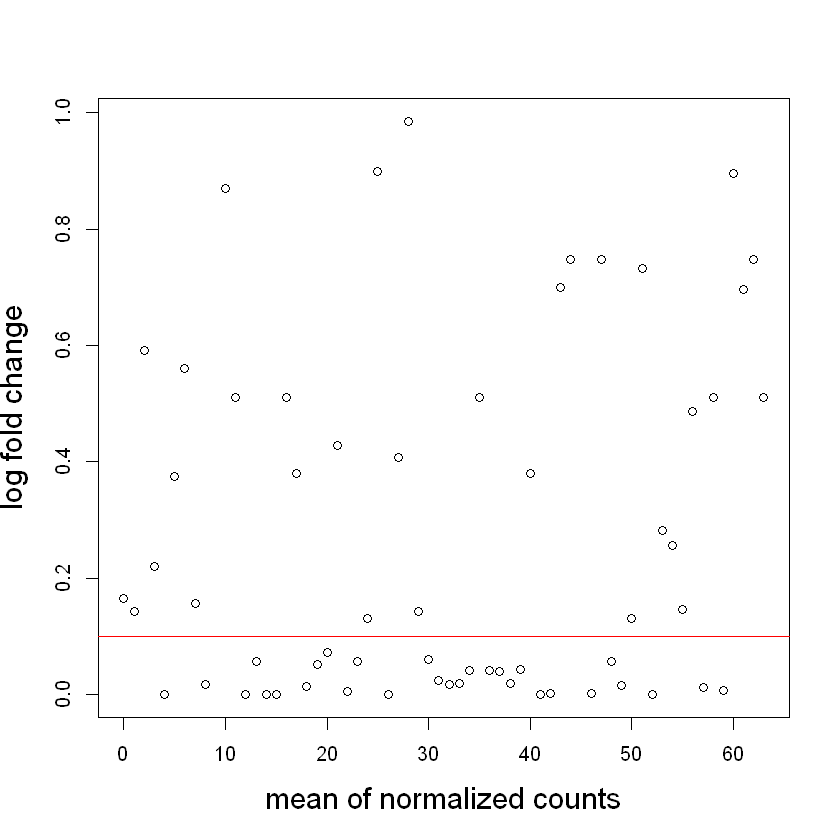

log2 fold change (MLE): WGHT 
Wald test p-value: WGHT 
DataFrame with 29 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
14    23.5089       1.503940  0.237045   6.34453 2.23101e-10 1.38323e-08
26   117.5627       0.939168  0.197789   4.74833 2.05108e-06 6.35834e-05
15    69.6019       0.434073  0.098165   4.42187 9.78524e-06 2.02228e-04
4    143.5815       0.636467  0.150600   4.22621 2.37664e-05 3.51176e-04
12   188.9150       0.942531  0.227391   4.14498 3.39848e-05 3.51176e-04
...       ...            ...       ...       ...         ...         ...
13    76.3889       0.262872 0.1157411   2.27121   0.0231342   0.0570954
23   152.3163      -0.303452 0.1347088  -2.25266   0.0242809   0.0570954
48   116.5553       0.315363 0.1405669   2.24351   0.0248641   0.0570954
30   147.6561       0.211521 0.0960697   2.20174   0.0276835   0.0612991
20   121.3658       0.249928 0.1

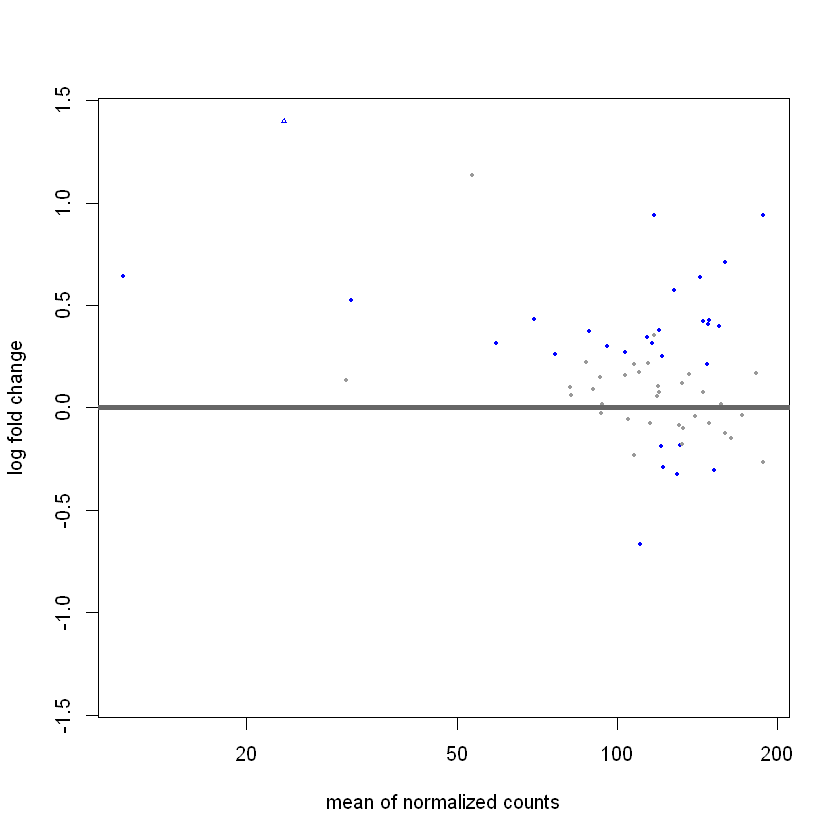

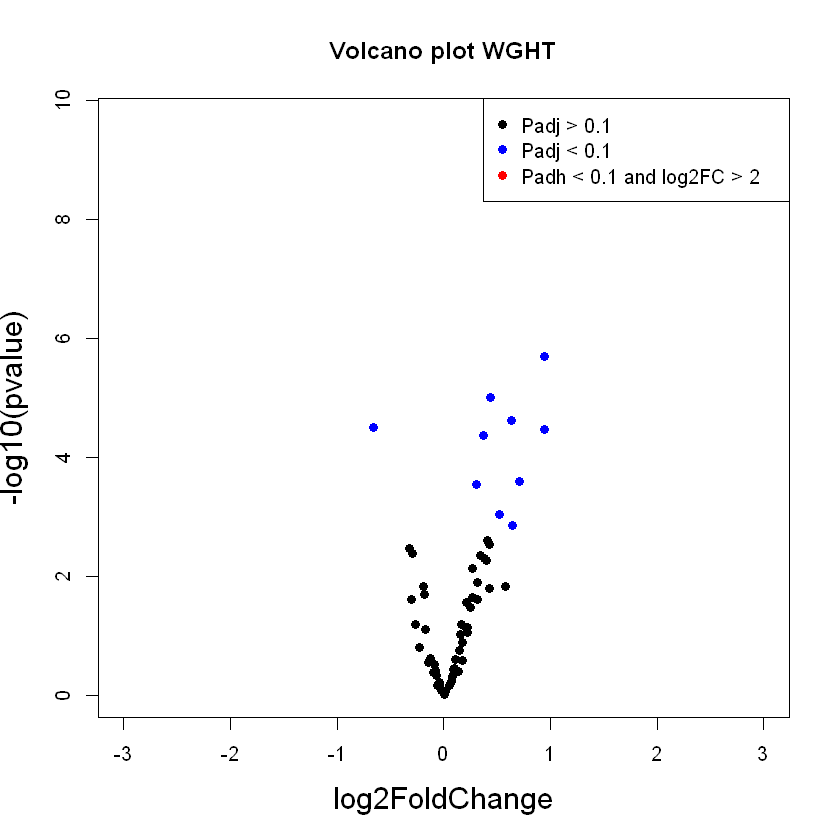

In [15]:
morph_analysis("WGHT", ~ WGHT, FALSE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 10, 16%
LFC < 0 (down)     : 2, 3.1%
outliers [1]       : 3, 4.7%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



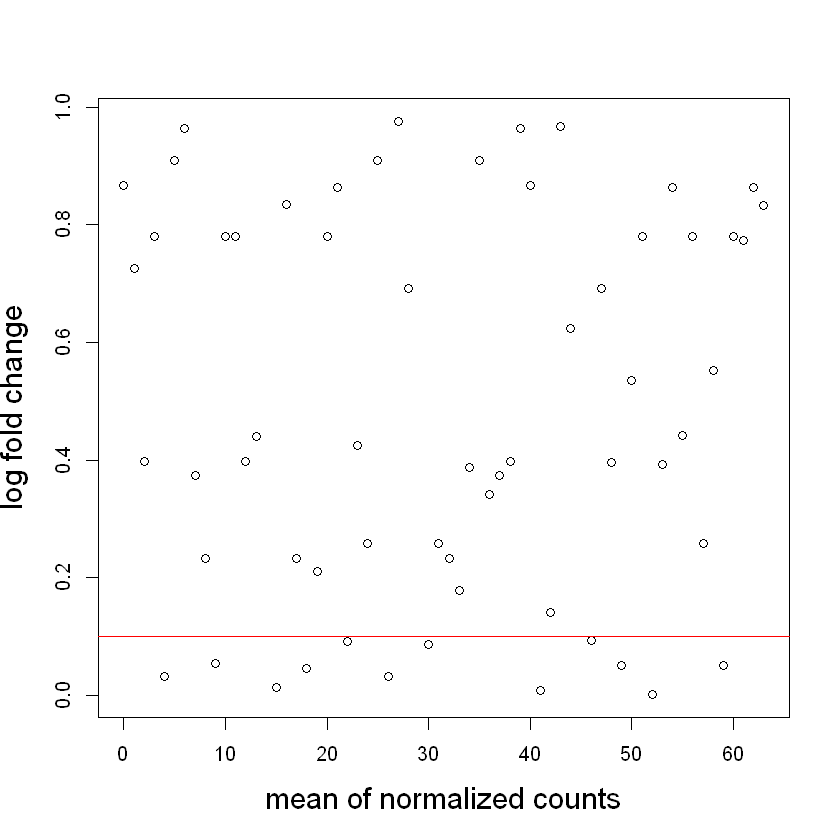

log2 fold change (MLE): BMI 
Wald test p-value: BMI 
DataFrame with 12 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
52   110.6787      -0.694680 0.1602130  -4.33598 1.45115e-05 0.000885199
41    88.5211       0.336380 0.0924386   3.63896 2.73742e-04 0.008349142
15    69.6019       0.344311 0.1008254   3.41492 6.38008e-04 0.012972835
4    143.5815       0.467493 0.1539080   3.03748 2.38564e-03 0.031216741
26   117.5627       0.608892 0.2018669   3.01631 2.55875e-03 0.031216741
...       ...            ...       ...       ...         ...         ...
59    11.7334       0.559184 0.2036566   2.74572  0.00603784   0.0506357
9    117.5544       0.343674 0.1293614   2.65670  0.00789101   0.0534835
30   147.6561       0.235439 0.0960296   2.45174  0.01421691   0.0867231
22    31.5082       0.387541 0.1614675   2.40012  0.01638976   0.0908886
46    95.8441       0.200709 0.084

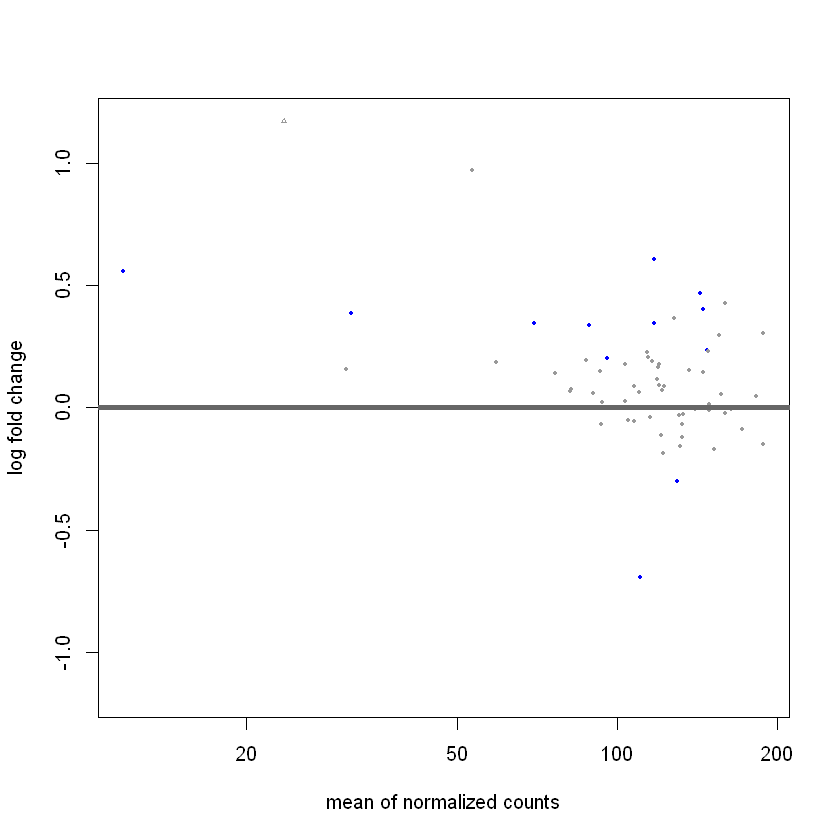

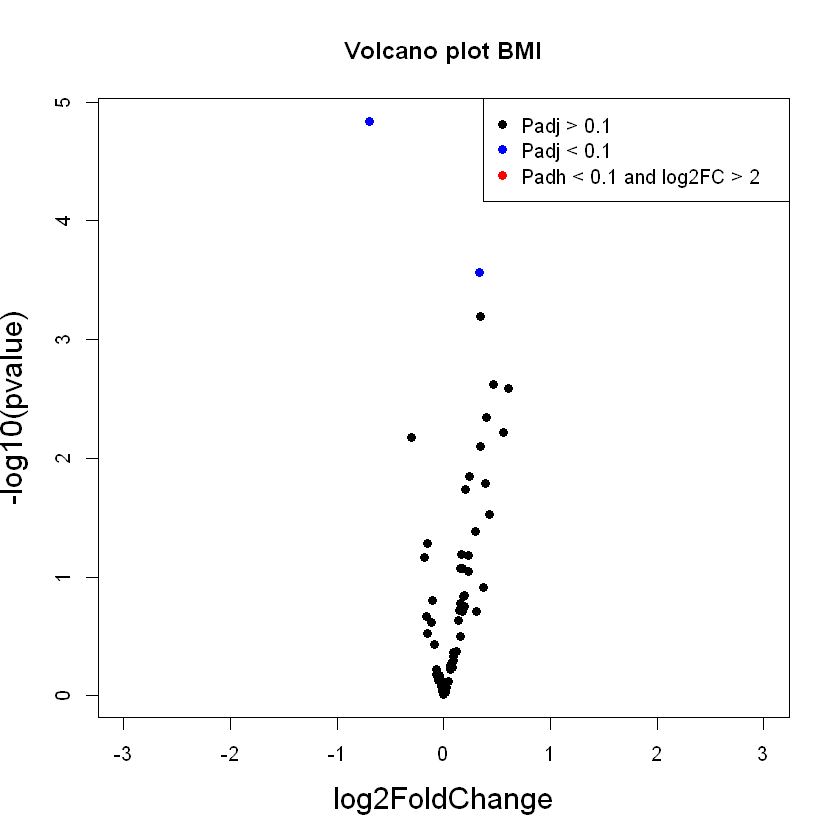

In [16]:
morph_analysis("BMI", ~BMI, FALSE)

### Q2.3 - Accounting for confounding variables
In the previous section, we only analysed one clinical variable at a time. Now, we account for confounding variables by using formulas of the form "VAR + X + Y", where the multivariate association of morphological clusters with variables VAR are calculated adjusted for the variations of X and Y. The rest of the analysis remains the same. We start off with the AGE variable, which we found in the previous section to be confounded by TRISCHD and COHORT.

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 12, 19%
LFC < 0 (down)     : 14, 22%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



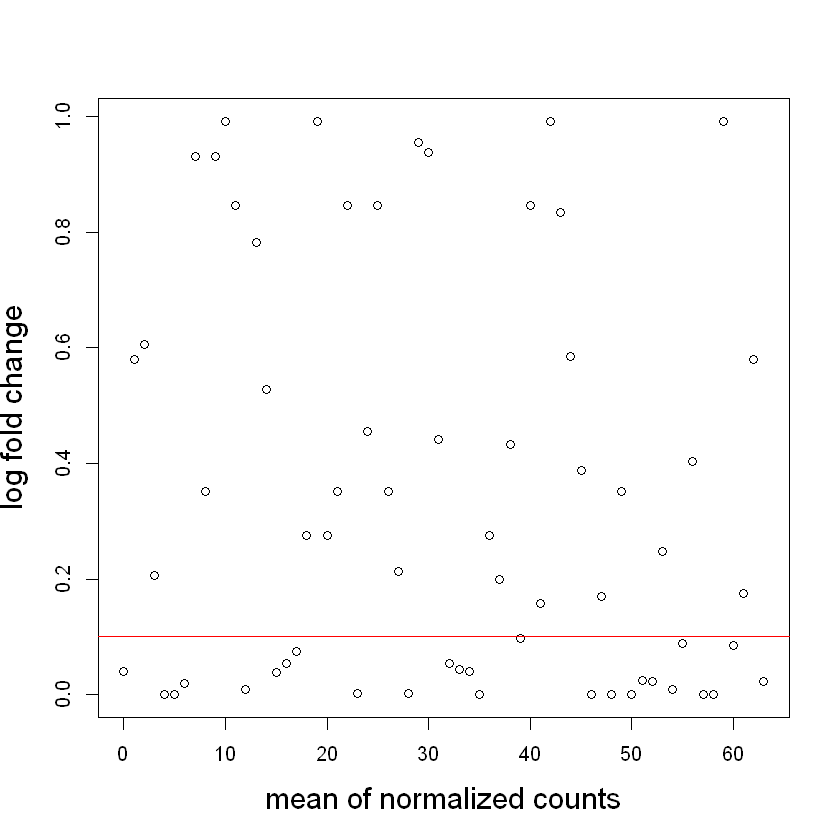

log2 fold change (MLE): COHORT P vs O 
Wald test p-value: COHORT P vs O 
DataFrame with 26 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
35   133.1940       -2.04215  0.317882  -6.42426 1.32512e-10 8.48077e-09
5    159.5815       -1.62150  0.278092  -5.83079 5.51656e-09 1.76530e-07
46    95.8441        1.22842  0.231243   5.31225 1.08282e-07 1.73252e-06
57   148.2410        1.79116  0.336571   5.32178 1.02757e-07 1.73252e-06
4    143.5815        1.90185  0.434979   4.37228 1.22956e-05 1.57384e-04
...       ...            ...       ...       ...         ...         ...
32    114.069       0.839489  0.356672   2.35368   0.0185888   0.0540766
17    119.358      -0.623138  0.281829  -2.21105   0.0270324   0.0752206
60    156.779      -0.643164  0.299616  -2.14663   0.0318229   0.0848612
55    132.816       0.673145  0.318379   2.11429   0.0344905   0.0882956
39    149.278 

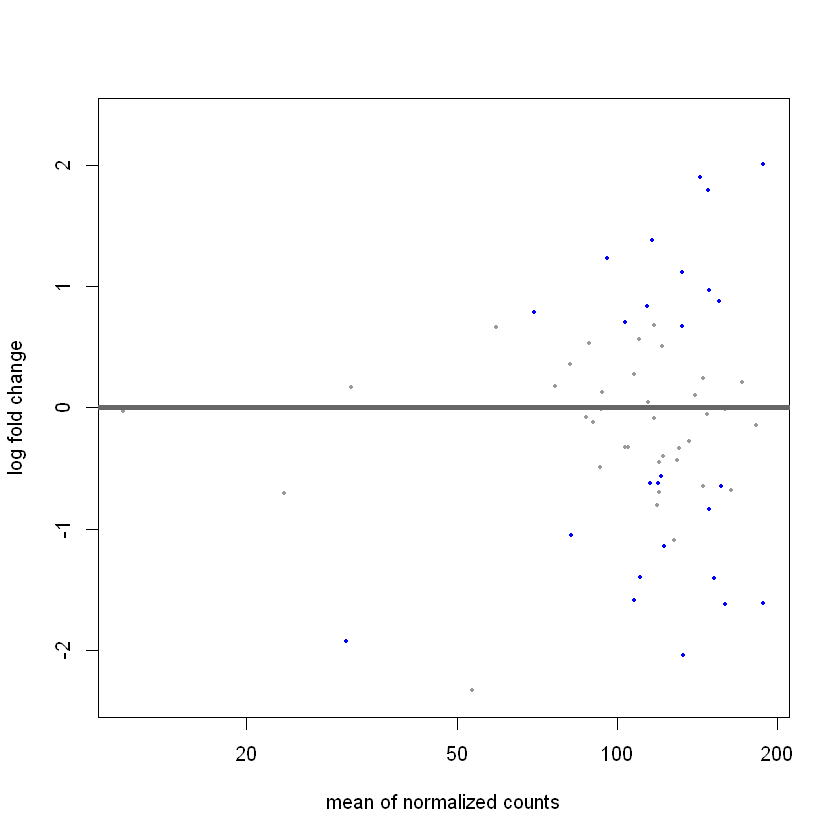

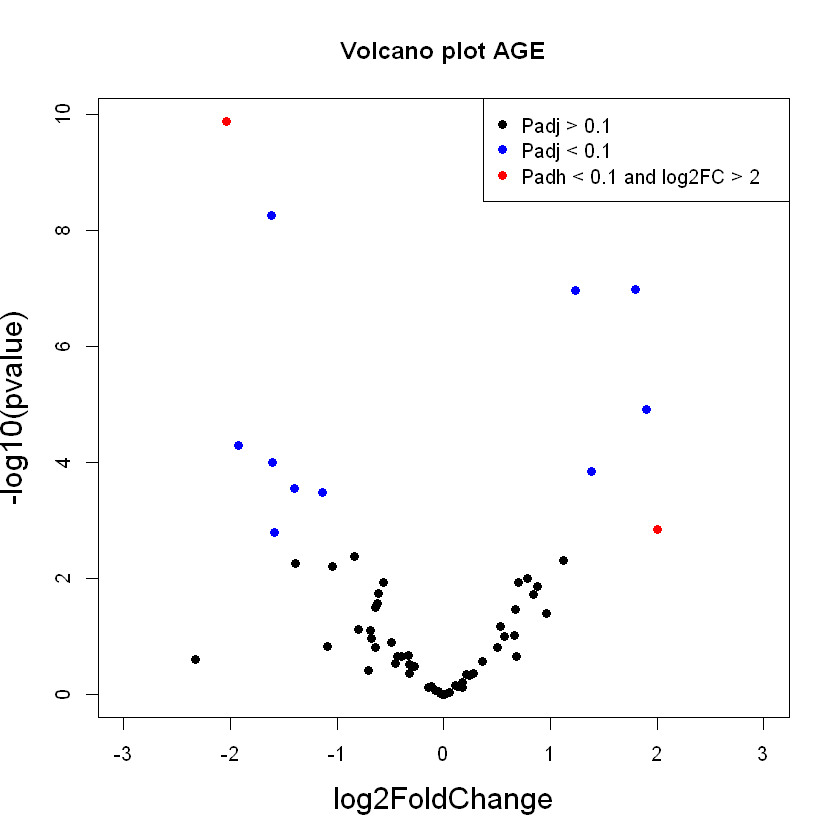

In [20]:
morph_analysis("AGE", ~AGE + TRISCHD + COHORT, FALSE, TRUE)

### Q2.2 - Technical variables vs. morphology

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 8 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 25, 39%
LFC < 0 (down)     : 25, 39%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



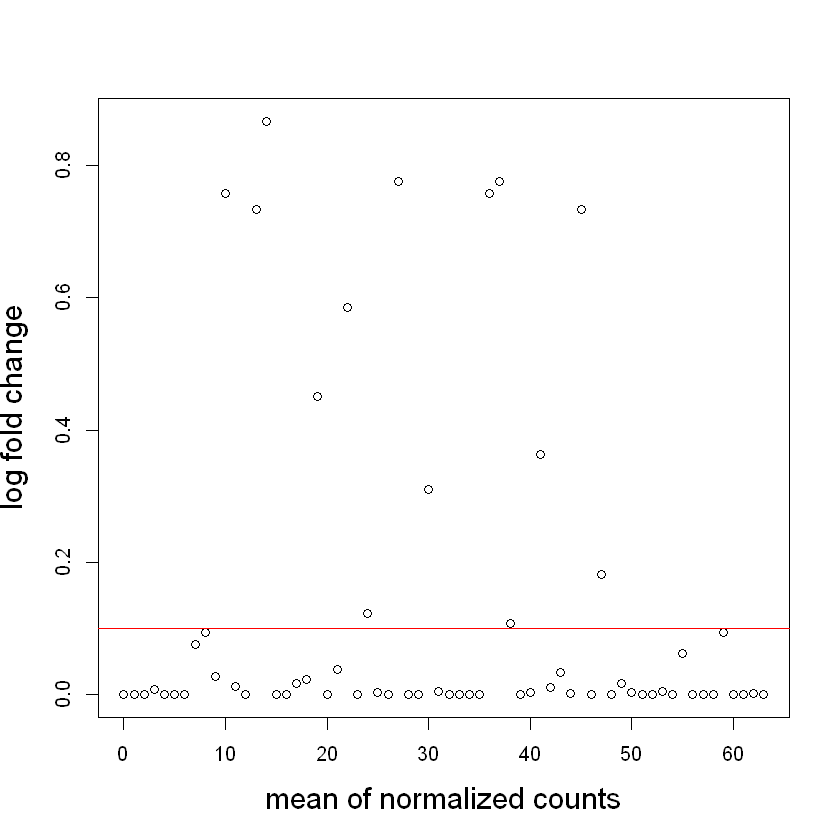

log2 fold change (MLE): COHORT P vs O 
Wald test p-value: COHORT P vs O 
DataFrame with 50 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
57    148.241        2.34432  0.217897  10.75884 5.38421e-27 3.44589e-25
33    155.450        2.41645  0.236885  10.20096 1.96322e-24 6.28231e-23
48    116.555        2.28969  0.233212   9.81806 9.41351e-23 2.00822e-21
12    188.915        3.79242  0.400244   9.47527 2.66064e-21 4.25703e-20
35    133.194       -1.90066  0.201448  -9.43501 3.90950e-21 5.00417e-20
...       ...            ...       ...       ...         ...         ...
21   130.7797      -0.371828  0.168324  -2.20901   0.0271740   0.0378073
55   132.8157       0.402014  0.201139   1.99869   0.0456419   0.0621507
7     87.3322      -0.495374  0.260611  -1.90082   0.0573260   0.0764347
8    121.9710      -0.367821  0.205356  -1.79114   0.0732714   0.0937874
59    10.4150 

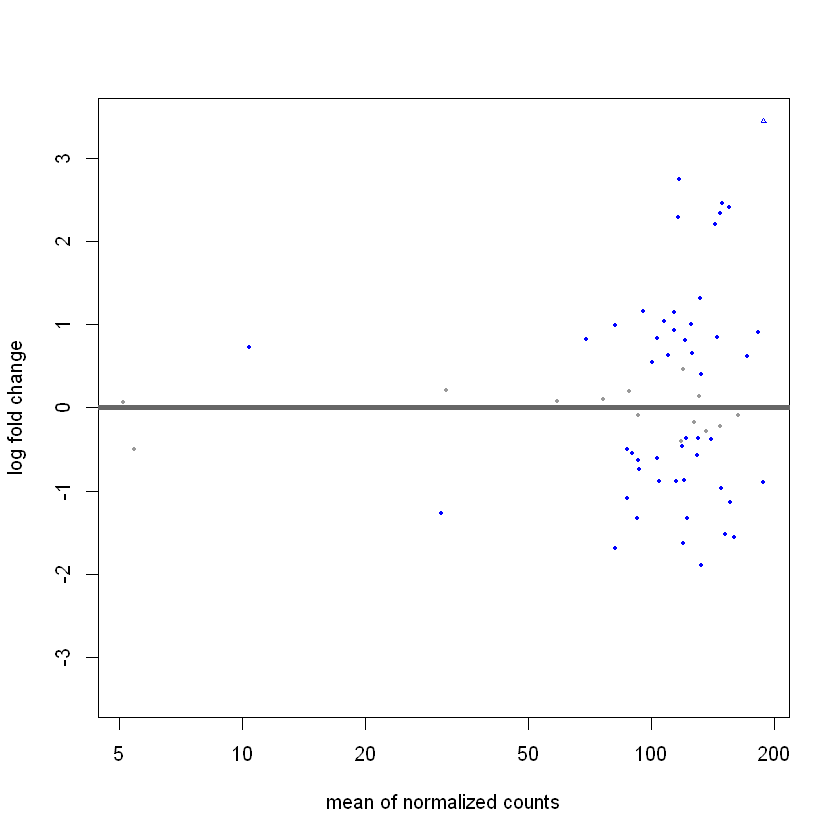

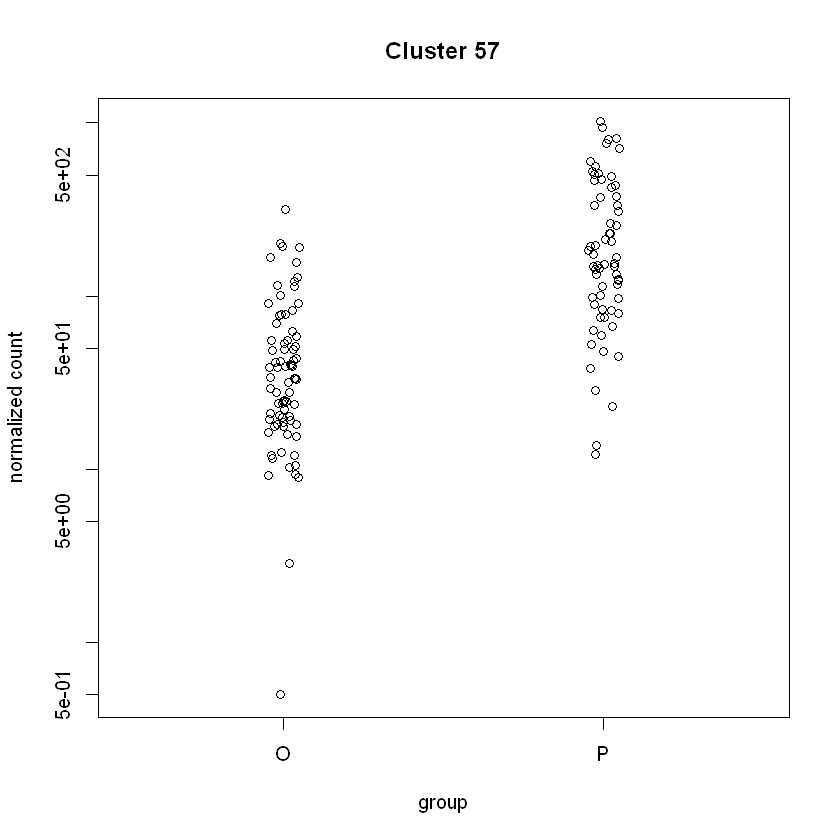

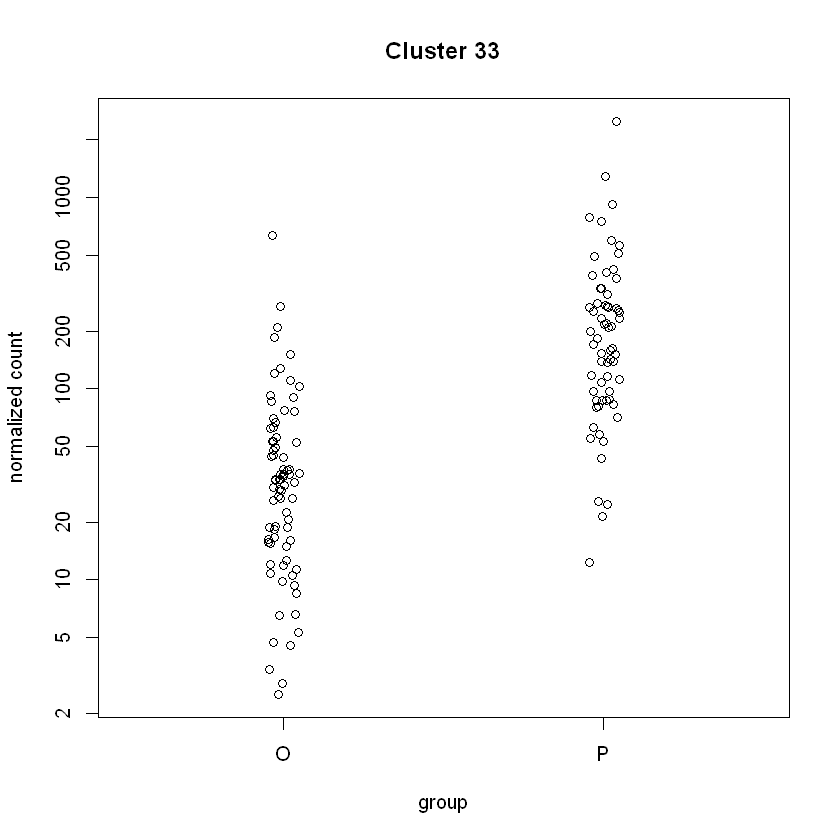

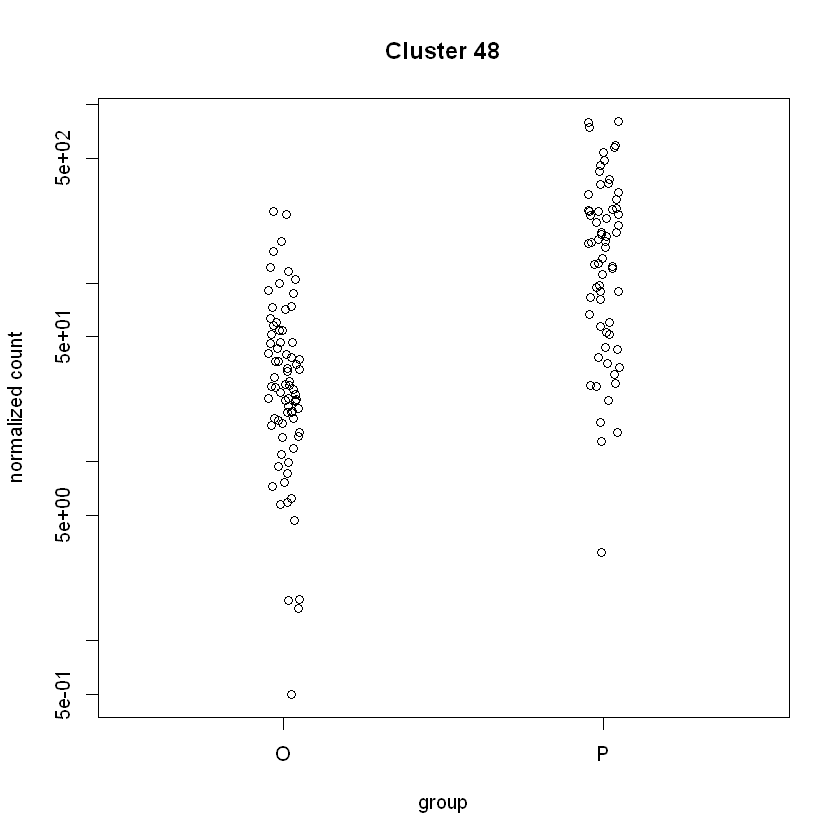

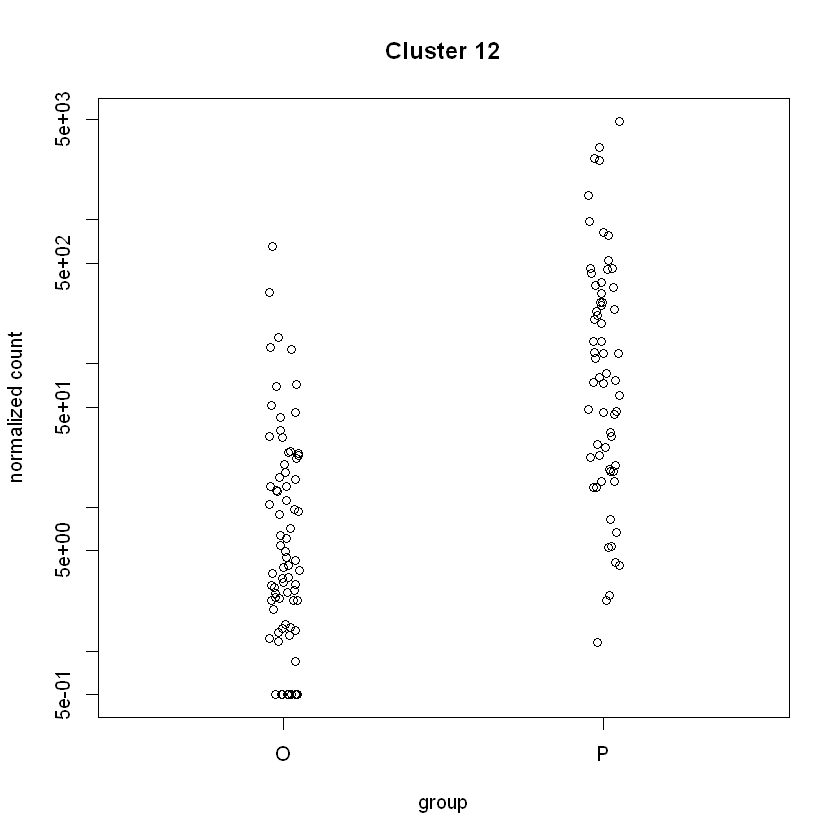

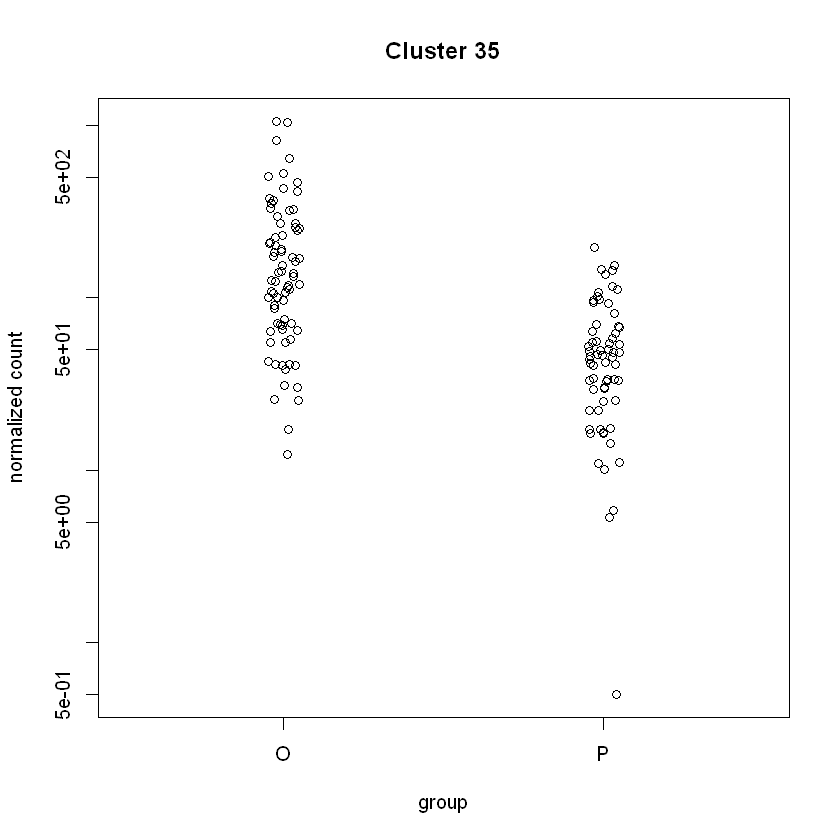

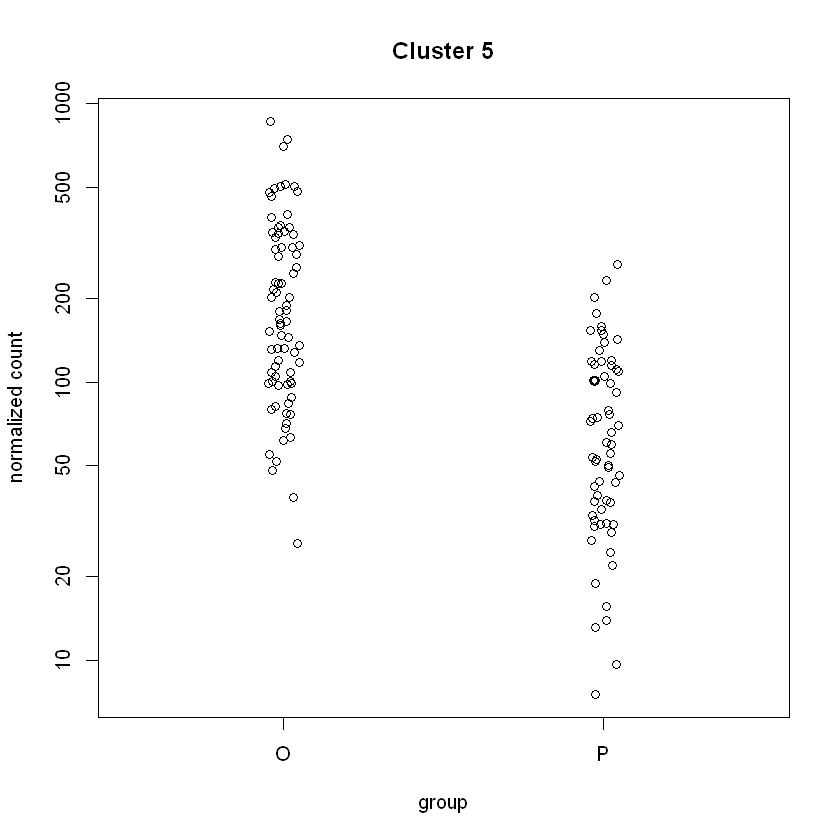

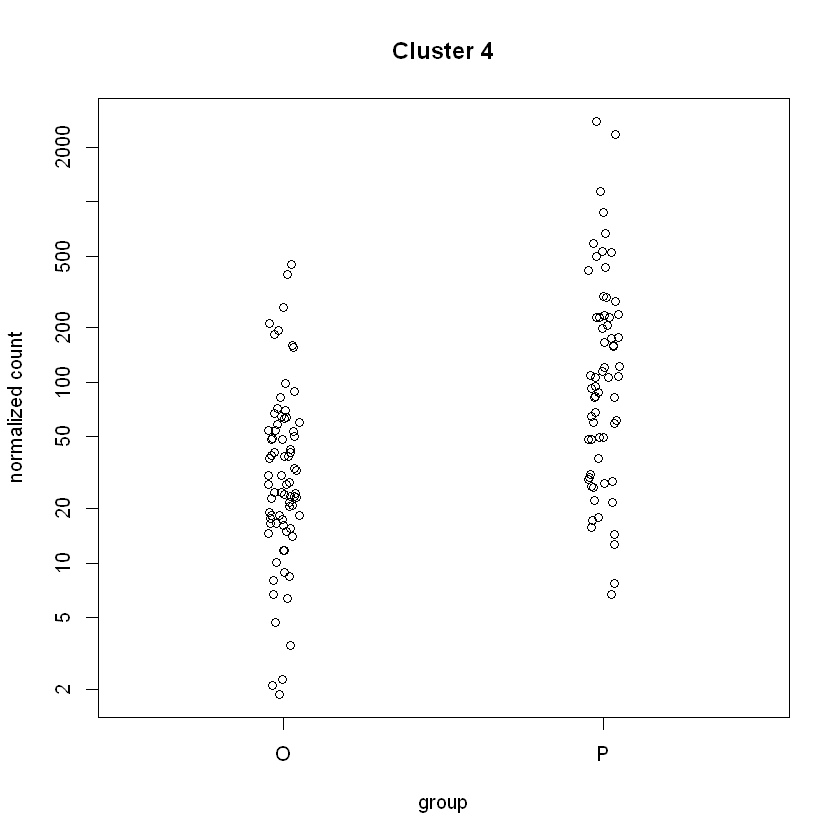

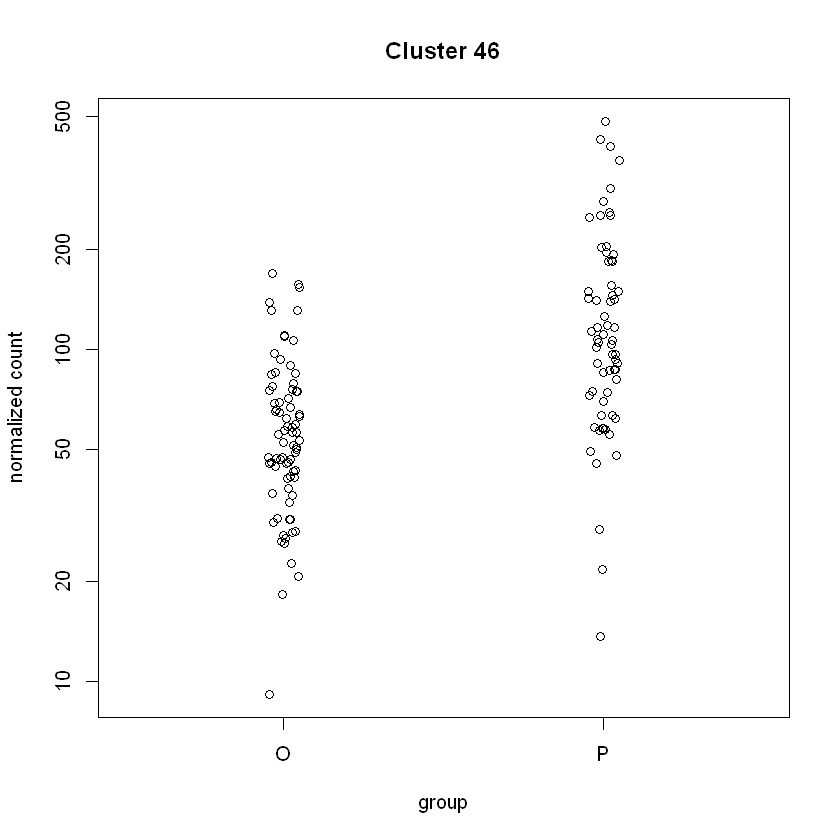

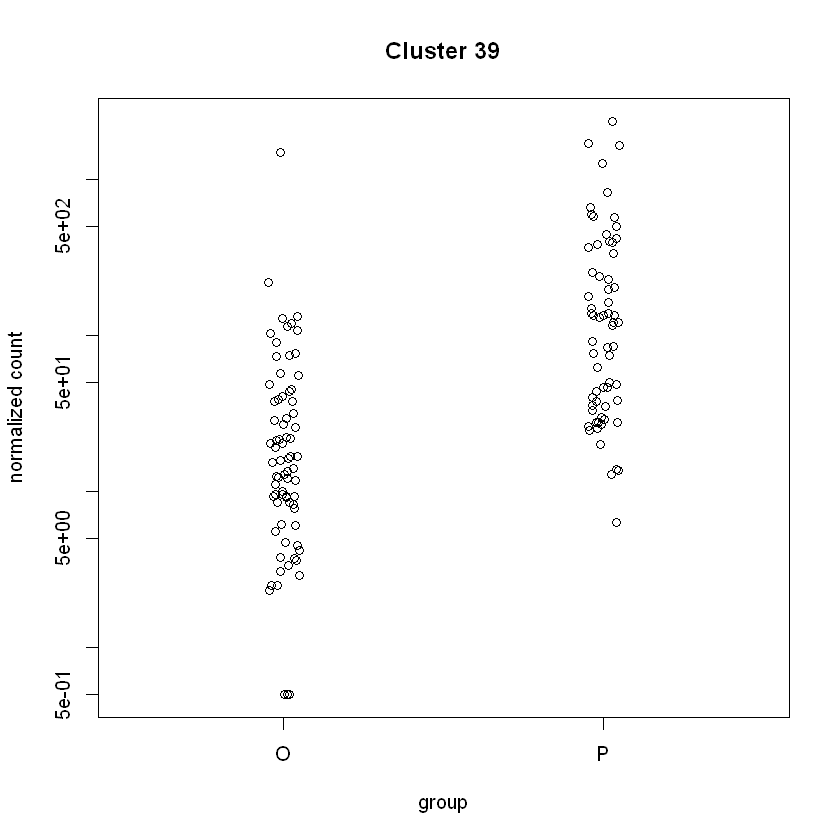

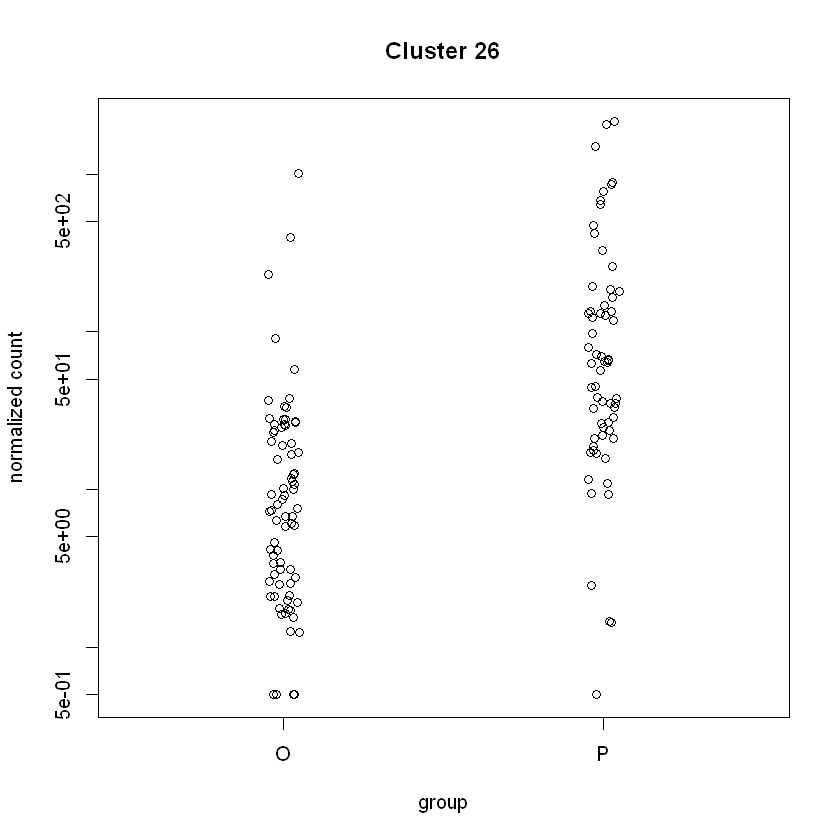

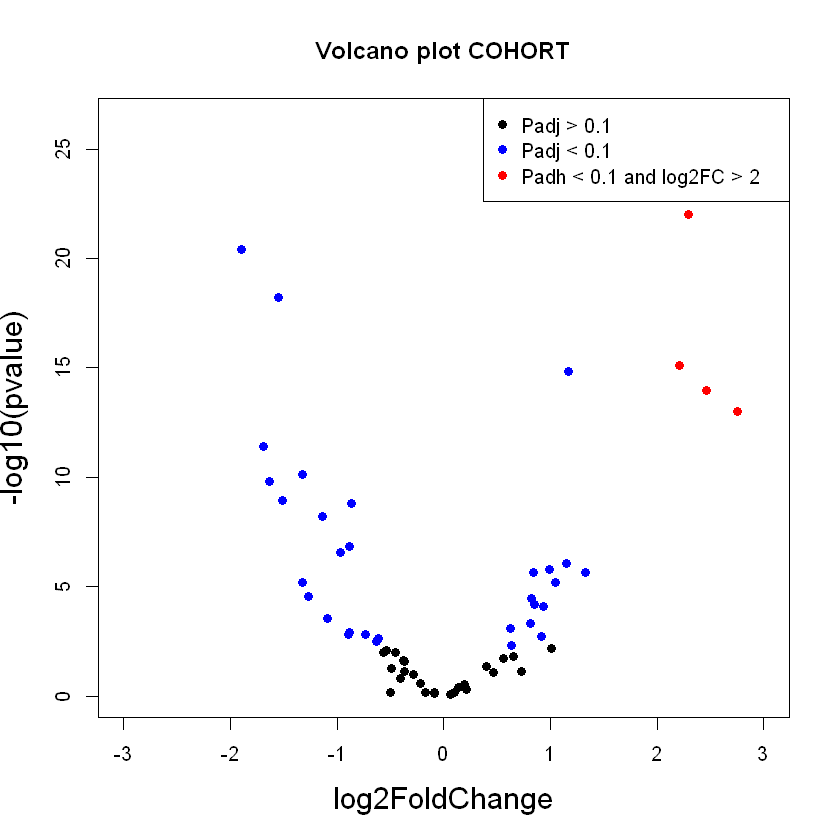

In [17]:
morph_analysis("COHORT", ~ COHORT, TRUE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 2 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 15, 23%
LFC < 0 (down)     : 20, 31%
outliers [1]       : 1, 1.6%
low counts [2]     : 0, 0%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



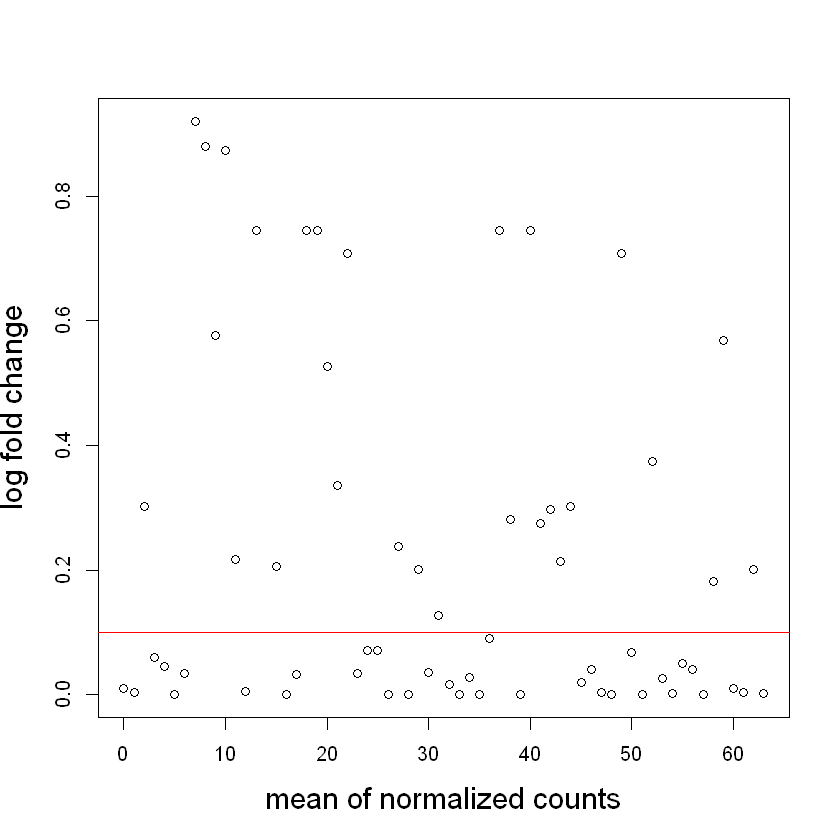

log2 fold change (MLE): DTHHRDY 4 vs 0 
Wald test p-value: DTHHRDY 4 vs 0 
DataFrame with 35 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
28    122.696       -1.87755  0.302180  -6.21333 5.18725e-10 1.97544e-08
35    133.194       -1.93637  0.313153  -6.18346 6.27125e-10 1.97544e-08
33    155.450        1.97710  0.368779   5.36120 8.26727e-08 1.73613e-06
5     159.582       -1.41964  0.269473  -5.26820 1.37765e-07 2.16980e-06
57    148.241        1.69382  0.338032   5.01083 5.41955e-07 6.82863e-06
...       ...            ...       ...       ...         ...         ...
3    110.1487       0.744137  0.341941   2.17622   0.0295390   0.0600309
50   188.2888      -0.902298  0.426150  -2.11733   0.0342322   0.0673946
24   136.7598      -0.550904  0.264670  -2.08147   0.0373905   0.0710444
25    93.5703      -0.727940  0.351461  -2.07119   0.0383414   0.0710444
36   127.937

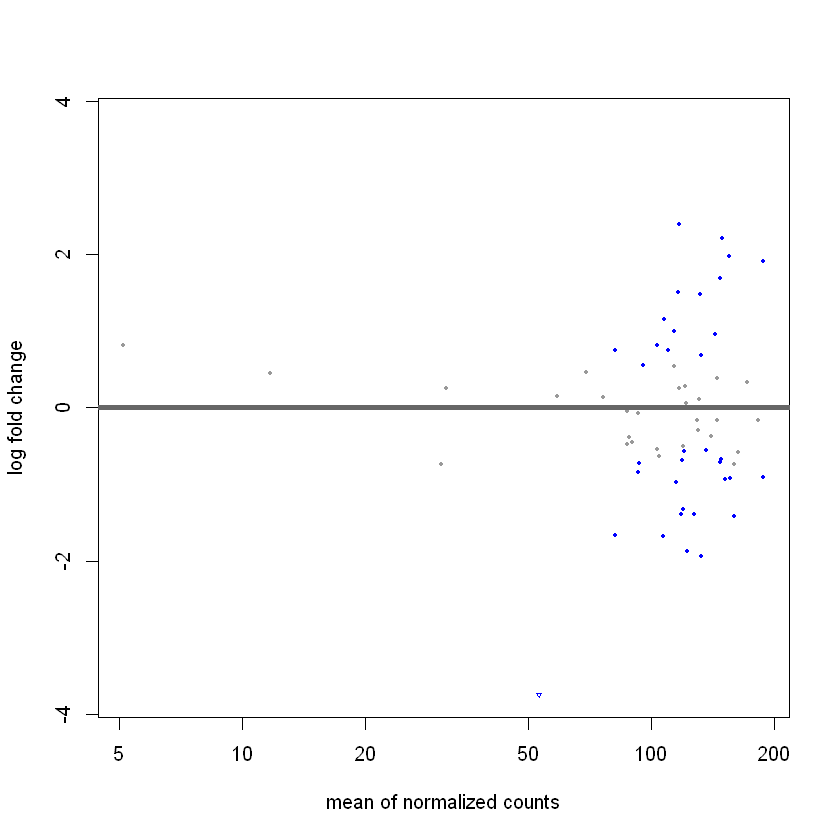

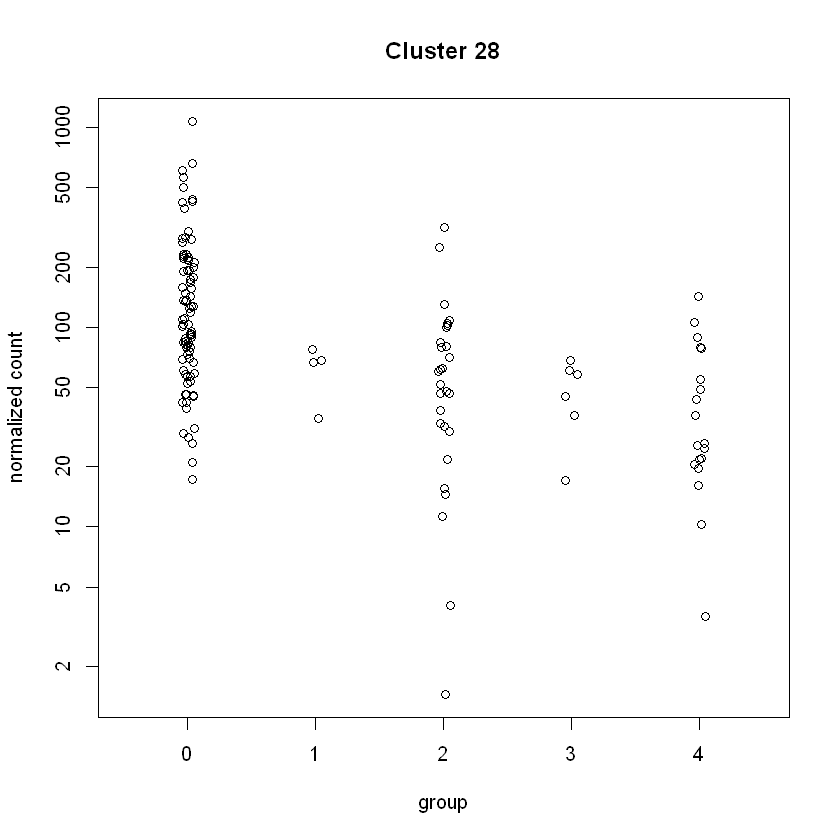

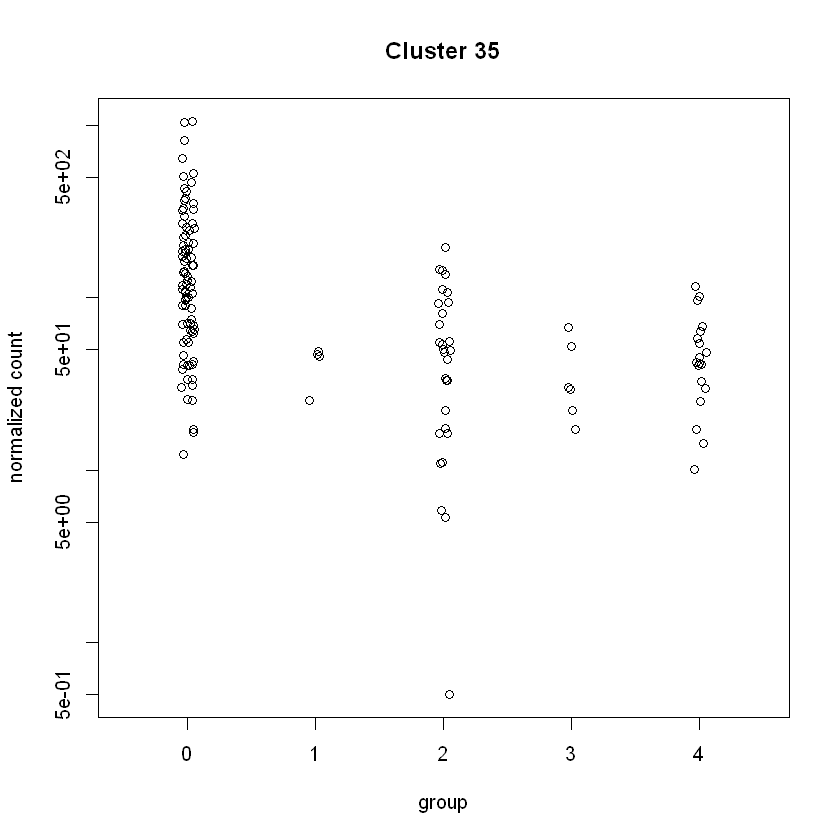

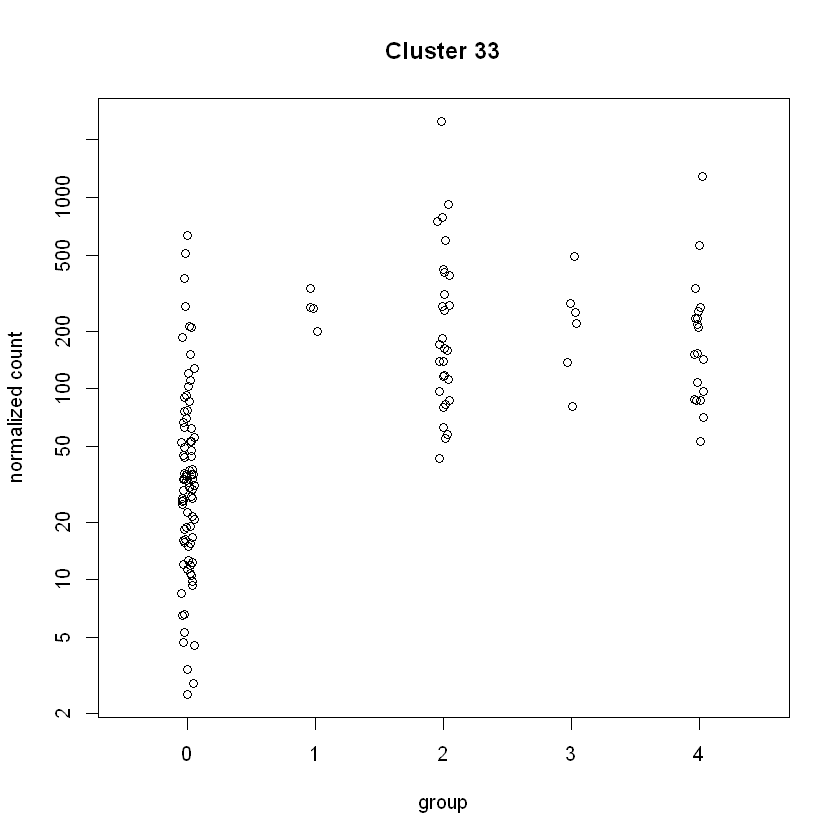

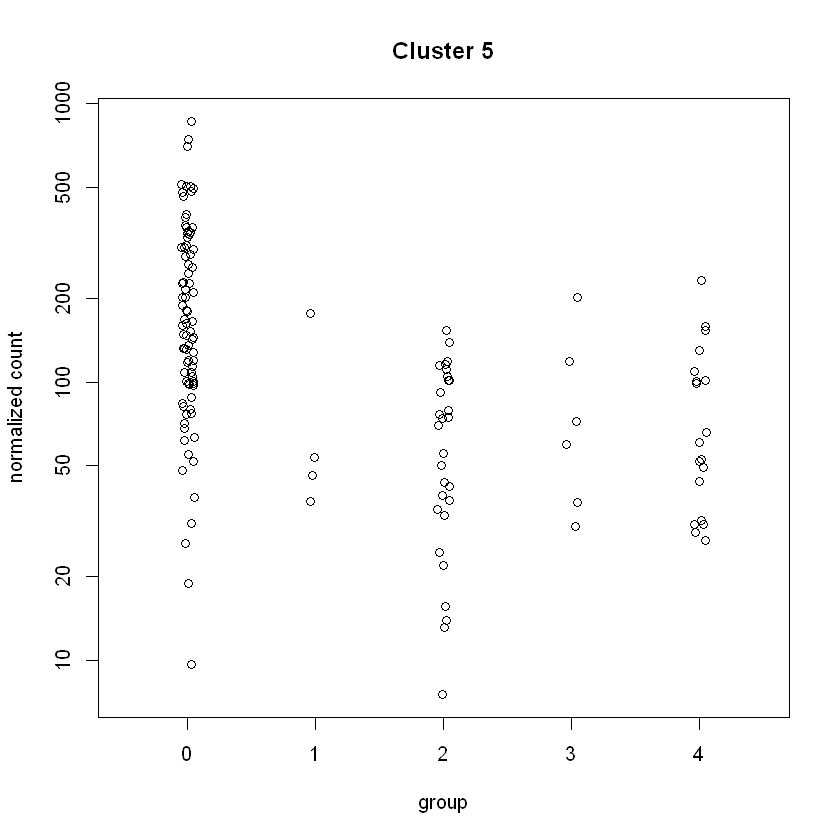

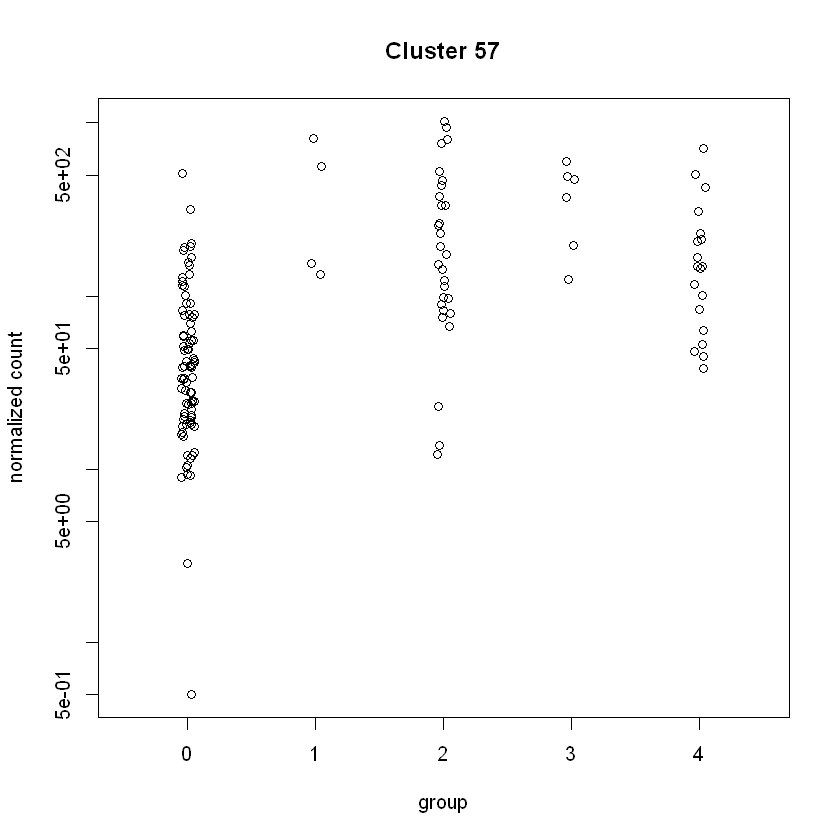

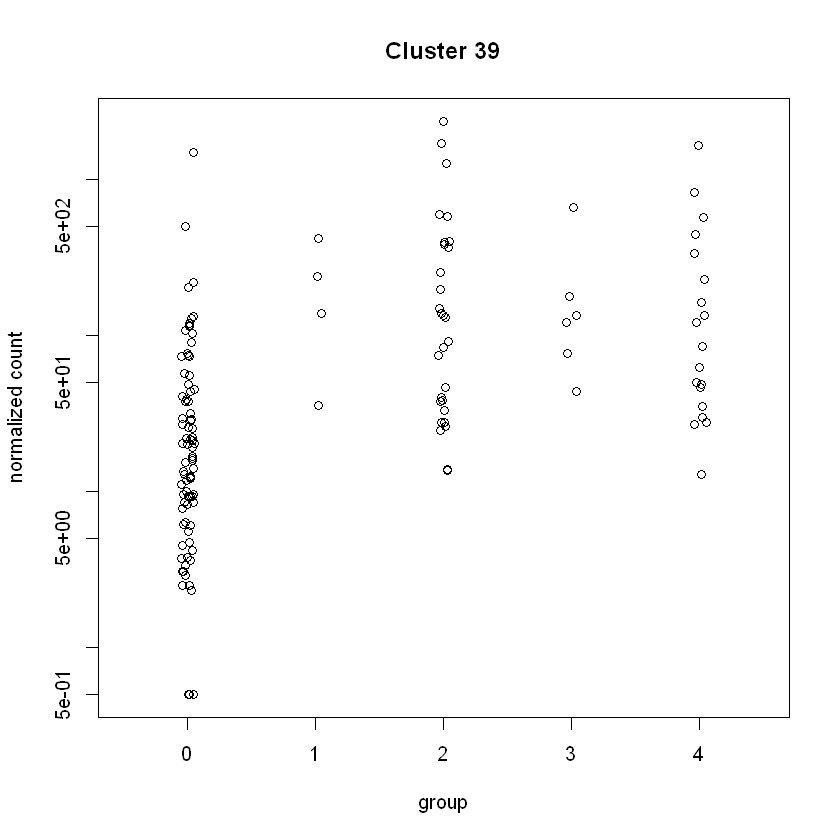

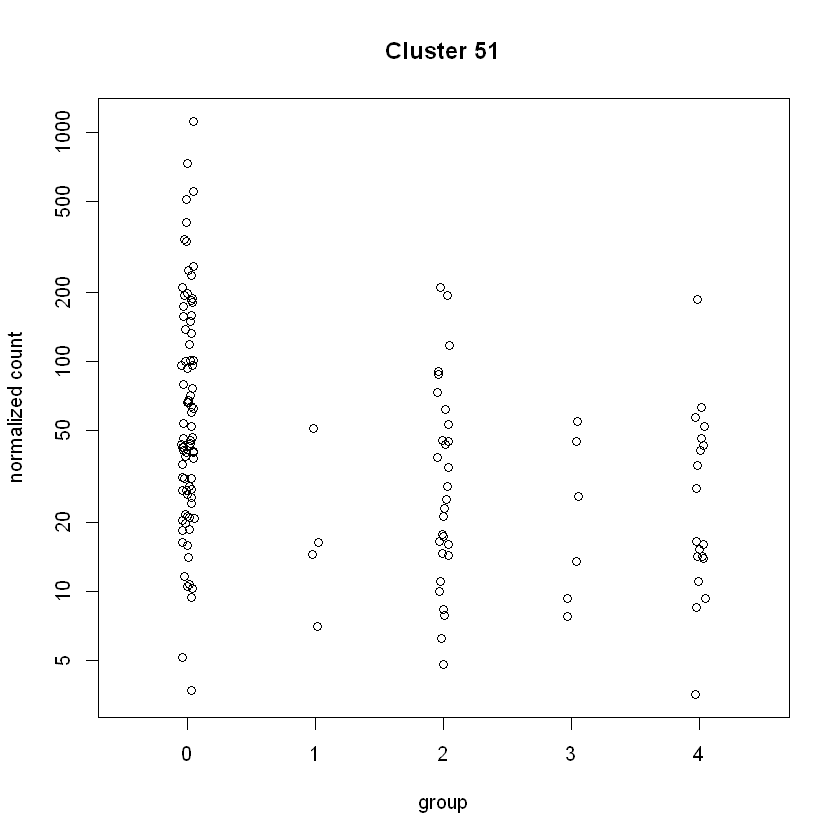

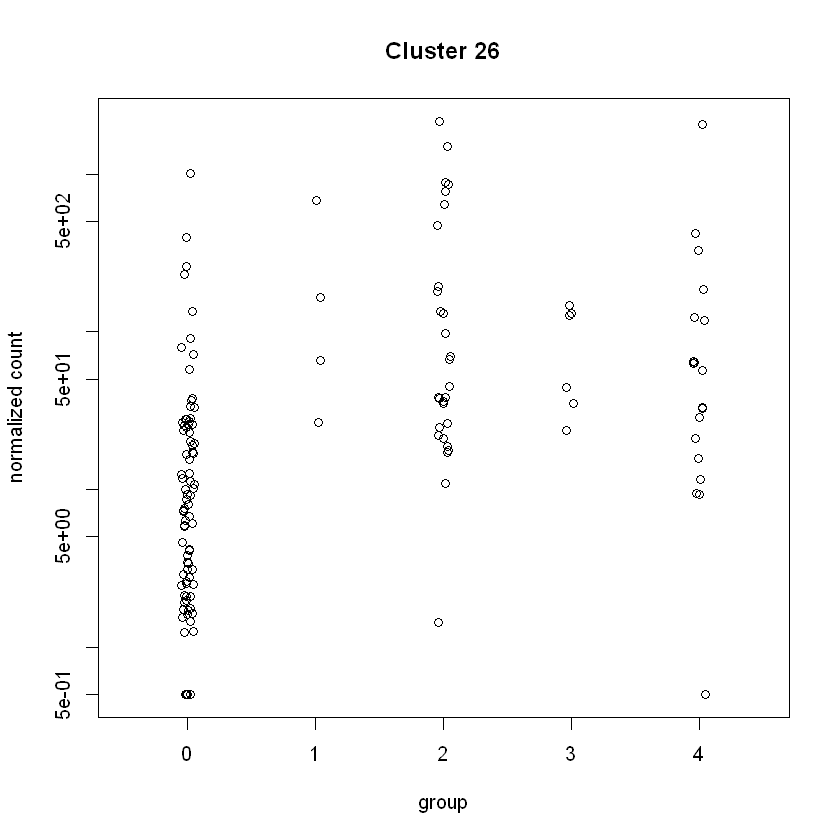

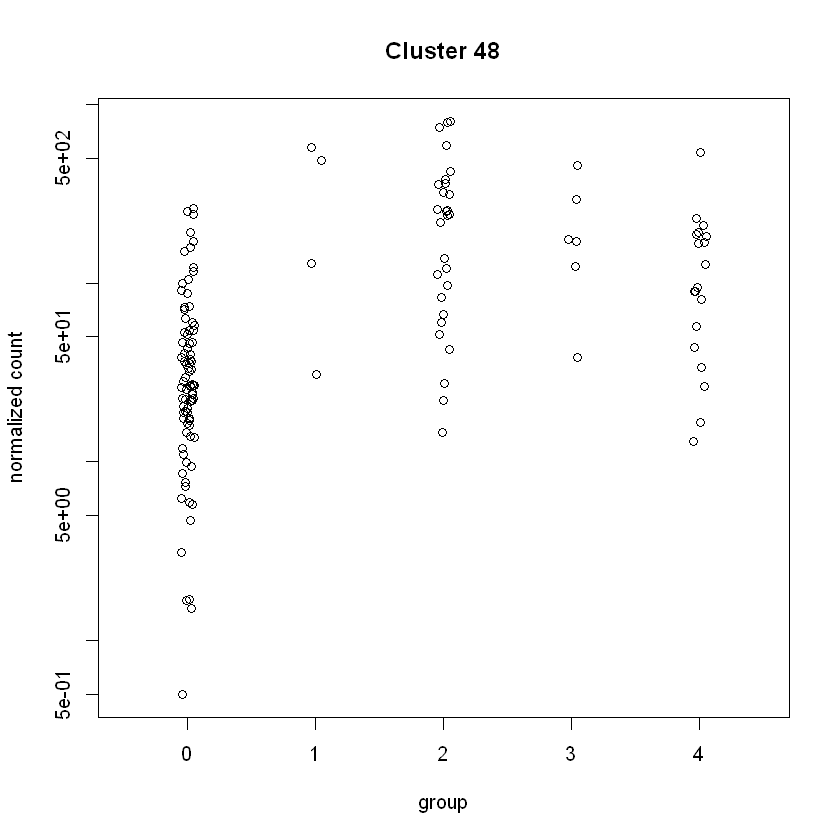

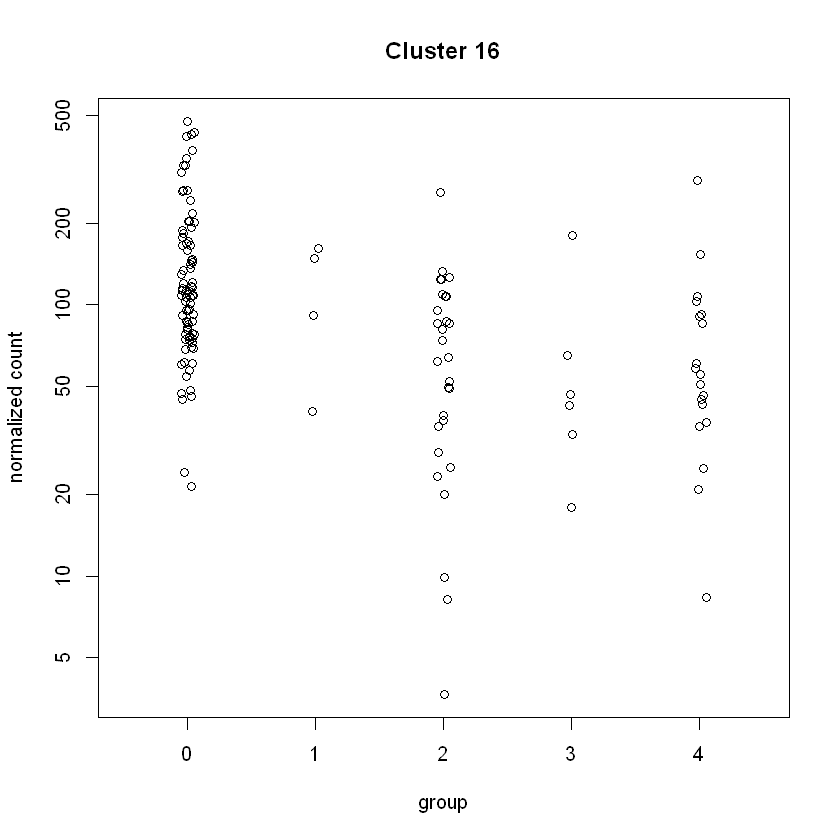

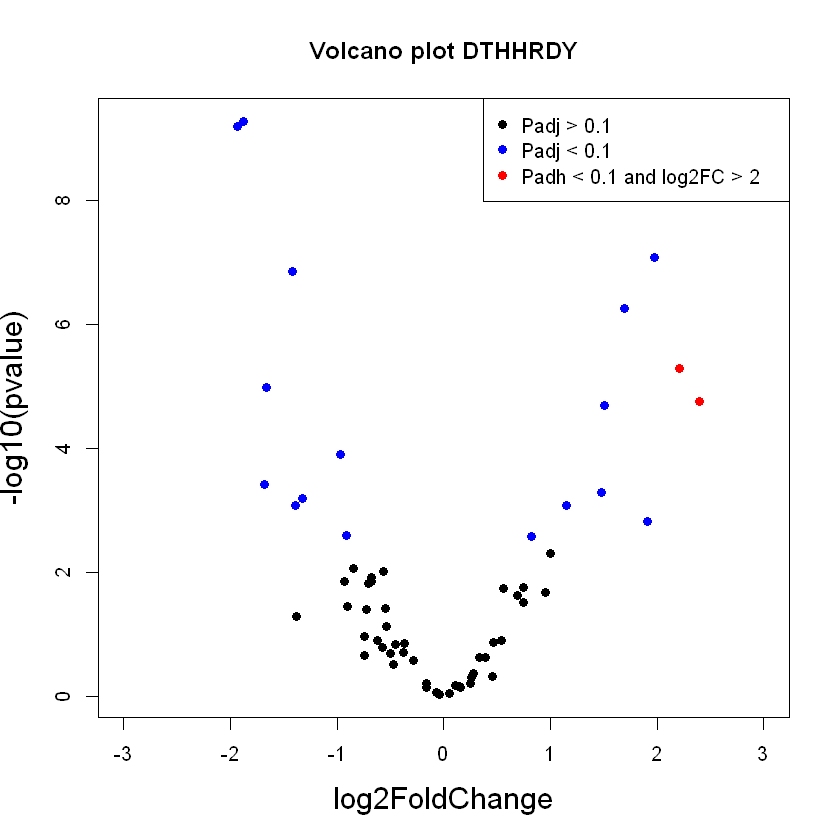

In [18]:
morph_analysis("DTHHRDY", ~ DTHHRDY, TRUE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing




out of 64 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 22, 34%
LFC < 0 (down)     : 23, 36%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 12)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



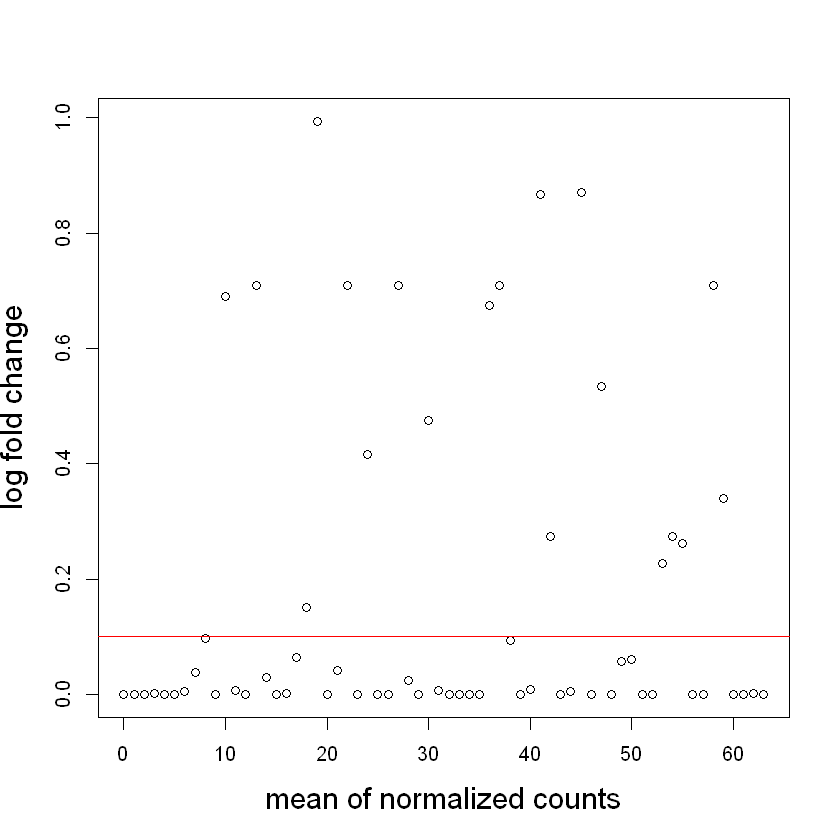

log2 fold change (MLE): TRISCHD 
Wald test p-value: TRISCHD 
DataFrame with 45 rows and 6 columns
     baseMean log2FoldChange     lfcSE      stat      pvalue        padj
    <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
33    155.450        1.36573  0.114273  11.95146 6.37978e-33 4.08306e-31
39    149.278        1.68060  0.148912  11.28587 1.54111e-29 4.93156e-28
57    148.241        1.18617  0.112497  10.54408 5.40982e-26 1.15410e-24
26    117.563        1.75713  0.174605  10.06346 8.01306e-24 1.28209e-22
12    188.915        1.81290  0.204185   8.87874 6.76215e-19 8.65555e-18
...       ...            ...       ...       ...         ...         ...
49    129.846      -0.233258 0.1116254  -2.08965   0.0366494   0.0572089
50    188.289      -0.294193 0.1430206  -2.05700   0.0396865   0.0604747
17    119.358      -0.182794 0.0902285  -2.02591   0.0427745   0.0636643
38    119.988       0.252014 0.1363997   1.84761   0.0646584   0.0940486
8     121.971      -0.1870

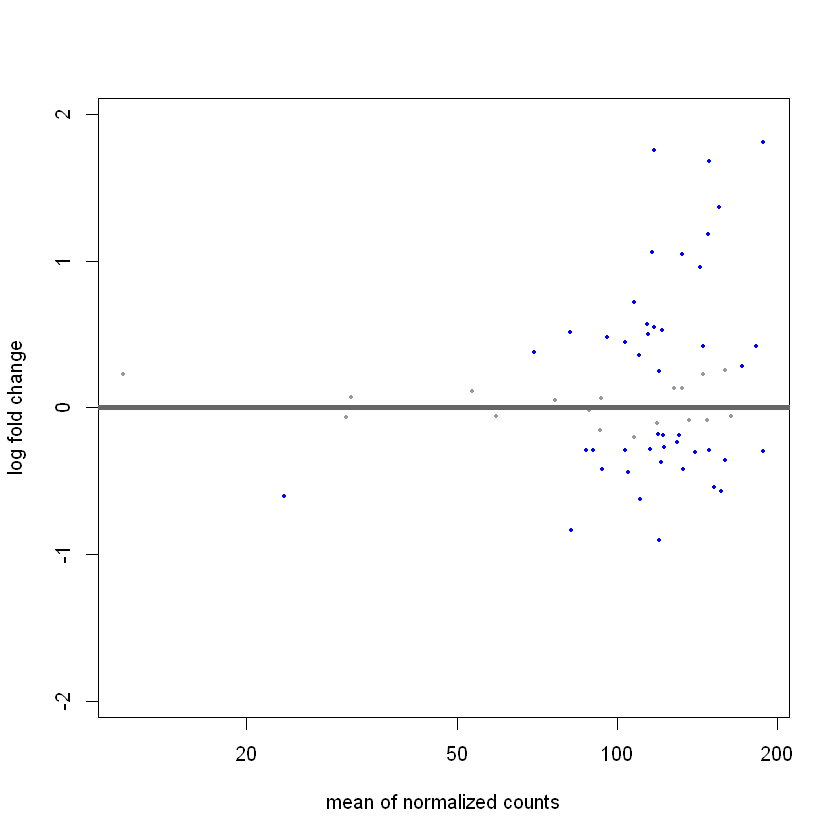

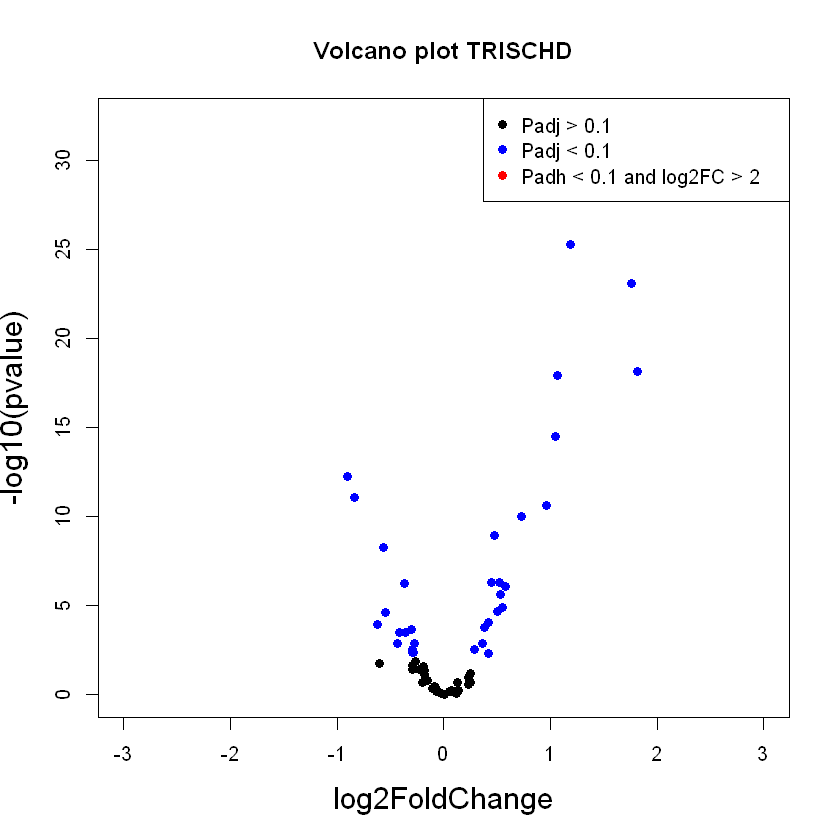

In [19]:
morph_analysis("TRISCHD", ~TRISCHD, FALSE)

## Q3 Morphology vs gene expression

In [2]:
morphological_counts = read.delim(file='morphological-counts.tsv',sep='\t',header=TRUE,row.names=1)
RNA_read_counts = read.delim(file='RNA-read-counts.tsv',sep='\t',header=TRUE,row.names=1)
RNA_read_counts = subset(RNA_read_counts, select = -1)
#Gtex ids have lines in rna file, but dots in morph file --> change ids in rna matrix
names(RNA_read_counts) = gsub("\\.","-",names(RNA_read_counts))
head(morphological_counts)
head(RNA_read_counts)

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,⋯,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GTEX-1122O-0226,171,133,105,235,13,399,350,681,484,105,⋯,146,264,50,44,30,98,1069,686,513,84
GTEX-1128S-0126,198,60,131,345,261,332,186,285,176,135,⋯,7,416,65,378,63,12,655,199,207,334
GTEX-113JC-0126,175,95,73,160,48,163,93,398,301,56,⋯,65,224,153,29,5,3,438,232,115,34
GTEX-11DXX-0226,79,52,144,20,30,177,177,18,462,213,⋯,93,270,72,69,63,3,131,285,67,43
GTEX-11EM3-0126,20,22,107,74,49,589,466,88,49,140,⋯,99,41,150,18,2,2,193,44,66,24
GTEX-11EMC-0226,24,35,161,50,233,84,29,42,76,65,⋯,26,77,114,218,2,0,110,19,10,70


,GTEX-1122O-0226,GTEX-1128S-0126,GTEX-113JC-0126,GTEX-11DXX-0226,GTEX-11EM3-0126,GTEX-11EMC-0226,GTEX-11GSP-0126,GTEX-11I78-0526,GTEX-11P81-0126,GTEX-11TTK-0826,⋯,GTEX-1PBJI-0726,GTEX-1QCLZ-0626,GTEX-1QEPI-0726,GTEX-1QP28-0626,GTEX-1QP67-0326,GTEX-1QPFJ-0626,GTEX-1R46S-0426,GTEX-1R9JW-0226,GTEX-1RDX4-0926,GTEX-1S5ZU-0726
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000223972.5,0,0,0,1,0,0,0,0,0,0,⋯,0,1,0,0,1,0,0,0,0,1
ENSG00000227232.5,132,259,87,207,122,251,99,125,119,321,⋯,202,173,164,85,288,183,136,74,168,169
ENSG00000278267.1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000243485.5,0,1,1,0,3,0,0,0,0,0,⋯,0,0,1,0,0,0,0,0,1,0
ENSG00000237613.2,0,0,0,0,1,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
ENSG00000268020.3,0,0,0,1,1,0,1,1,0,0,⋯,0,2,1,0,1,0,0,1,0,1


The provided RNA count file has no missing values

In [20]:
any(is.na(RNA_read_counts))


[1] FALSE

For every sample, we have the RNA counts of 56200 genes

In [21]:
dim(RNA_read_counts)

[1] 56200   142

We construct a vector containing the Median Absolute Deviation (MAD) of the RNA count of every gene. This is a measure of the variability.

In [3]:
MADvector = c()
for (i in 1:nrow(RNA_read_counts)){
  MADvector = c(MADvector,mad(as.numeric(RNA_read_counts[i,])))
}
summary(MADvector)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0      0.0      1.5    369.7     75.6 850445.3 

We filter the genes based on the MAD. We want to only keep the genes with a big variability in expression, so we keep the genes with a MAD above the median. This way we discard the 50% of the dataset that varies the least.

In [4]:
RNA_read_counts = RNA_read_counts[which(MADvector > 1.5),]
dim(RNA_read_counts)

[1] 27850   142

We normalize the rows of the morphological counts by dividing each count by the total count of the row.

In [5]:
frequencies_clusters = data.frame(rep(list(rep(0,nrow(morphological_counts))),ncol(morphological_counts)))
rownames(frequencies_clusters) = rownames(morphological_counts)
names(frequencies_clusters) = names(morphological_counts)
for (i in 1:nrow(morphological_counts)){
  sum_r = sum(morphological_counts[i,])
  frequencies_clusters[i,] <- morphological_counts[i,]/sum_r
}
head(frequencies_clusters)

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,⋯,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GTEX-1122O-0226,0.011771995,0.009155996,0.007228418,0.016177888,0.000894947,0.02746799,0.024094727,0.046881454,0.033319565,0.007228418,⋯,0.0100509431,0.018174308,0.003442104,0.003029051,0.0020652623,0.0067465235,0.07359218,0.047225664,0.035315985,0.005782734
GTEX-1128S-0126,0.016727211,0.005068852,0.011066993,0.029145898,0.022049506,0.02804765,0.015713441,0.024077047,0.014868632,0.011404917,⋯,0.0005913661,0.035144040,0.005491256,0.031933767,0.0053222945,0.0010137704,0.05533497,0.016811692,0.017487539,0.028216609
GTEX-113JC-0126,0.017475534,0.009486719,0.007289794,0.015977631,0.004793289,0.01627721,0.009286998,0.039744358,0.030057919,0.005592171,⋯,0.0064909127,0.022368684,0.015278610,0.002895946,0.0004993010,0.0002995806,0.04373877,0.023167565,0.011483923,0.003395247
GTEX-11DXX-0226,0.009920884,0.006530202,0.018083637,0.002511616,0.003767424,0.02222780,0.022227804,0.002260455,0.058018335,0.026748713,⋯,0.0116790154,0.033906819,0.009041818,0.008665076,0.0079115911,0.0003767424,0.01645109,0.035790531,0.008413914,0.005399975
GTEX-11EM3-0126,0.002532287,0.002785515,0.013547734,0.009369461,0.006204102,0.07457584,0.059002279,0.011142061,0.006204102,0.017726007,⋯,0.0125348189,0.005191188,0.018992150,0.002279058,0.0002532287,0.0002532287,0.02443657,0.005571031,0.008356546,0.003038744
GTEX-11EMC-0226,0.005483208,0.007996345,0.036783185,0.011423349,0.053232808,0.01919123,0.006625543,0.009595613,0.017363491,0.014850354,⋯,0.0059401416,0.017591958,0.026045236,0.049805803,0.0004569340,0.0000000000,0.02513137,0.004340873,0.002284670,0.015992689


We will run an differential gene expression analysis for every morphological cluster except for cluster 14 (index 15 in the code here) because that one contains muscle tissue. Cluster 14 is used as a control variable.

In [7]:
rel_Morp = names(frequencies_clusters)[-c(15)]
dir.create("results_3_1") #create a folder on the computer to score result files
for (i in 1:length(rel_Morp)) {
  one_rel_Morph <- rel_Morp[i]
  print(one_rel_Morph)
  #design: ~ cluster_i + cluster14
  # cluster 14 is used as control: it contains irrelevant muscle tissue
  des <- as.formula(paste("~", one_rel_Morph, "+", names(frequencies_clusters)[15]))
  ddsfm <- DESeqDataSetFromMatrix(countData = RNA_read_counts,
                                  colData = frequencies_clusters, 
                                  design = des)
  ddsfm <- DESeq(ddsfm)
  res <- results(ddsfm)
  
  # Save res as a CSV file
  csv_file <- paste0("results_3_1\\res_", i, ".csv")
  write.csv(res, file = csv_file)
}

[1] "Mophological.cluster.0"


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



[1] "Mophological.cluster.1"


estimating size factors

estimating dispersions

gene-wise dispersion estimates



: 

: 

To determine for each morphological cluster, the significantly associated genes, the following datasets were loaded. These datasets contain for each morphological cluster, the log 2 fold change and adjusted p-value for each gene.

In [6]:
stats = lapply(paste("results_3_1\\",list.files(path="results_3_1"),sep=""), read.csv)
length(stats)

[1] 63

First of all, the number of significant down-regulated and up-regulated genes associated with each morphological cluster were determined and stored in a table. In order to account for the multiple testing problem, we divide our threshold alpha = 0.1 by 64, since we tested 64 clusters. Then, the number of genes in that subset is counted and the number of upregulated and down-regulated genes. These values are then stored in a table for each morphological cluster.

In [3]:
#Create a table with the numer of up- and down regulated genes for each cluster
sign_genes = data.frame(matrix(ncol=3, nrow=63))
colnames(sign_genes)=c("Total_regulated_genes", "Upregulated_genes", "Downregulated_genes")
threshold = 0.1/64
i = 1
for (s in stats) {
    #The number of significant genes
    significant = subset(s, padj < threshold)
    sign_genes[i,]$Total_regulated_genes = nrow(significant)

    #The number of up-regulated genes
    up = subset(significant, log2FoldChange > 0)
    sign_genes[i,]$Upregulated_genes = nrow(up)

    #The number of down-regulated genes
    down = subset(significant, log2FoldChange < 0)
    sign_genes[i,]$Downregulated_genes = nrow(down)
    i = i+1
}
sign_genes = cbind(Cluster=seq(0,63)[-15], sign_genes)
sign_genes

Cluster,Total_regulated_genes,Upregulated_genes,Downregulated_genes
<int>,<int>,<int>,<int>
0,11,11,0
1,0,0,0
2,13,13,0
3,4,4,0
4,11,11,0
5,6,6,0
6,7,7,0
7,4,4,0
8,2,2,0


In [89]:
# To print the latex code
significant_genes_xtable = xtable(significant_genes_table)
latex_code = print.xtable(significant_genes_xtable,tabular.environment = "longtable", floating = FALSE,include.rownames = FALSE)

% latex table generated in R 4.2.1 by xtable 1.8-4 package
% Thu Jun  1 16:36:48 2023
\begin{longtable}{rrrr}
  \hline
Cluster & Up-regulated genes & Down-regulated genes & Total regulated genes \\ 
  \hline
  0 &  11 &   0 &  11 \\ 
    1 &   0 &   0 &   0 \\ 
    2 &  13 &   0 &  13 \\ 
    3 &   4 &   0 &   4 \\ 
    4 &  11 &   0 &  11 \\ 
    5 &   6 &   0 &   6 \\ 
    6 &   7 &   0 &   7 \\ 
    7 &   4 &   0 &   4 \\ 
    8 &   2 &   0 &   2 \\ 
    9 &   0 &   0 &   0 \\ 
   10 &   7 &   0 &   7 \\ 
   11 &   1 &   0 &   1 \\ 
   12 &  13 &   0 &  13 \\ 
   13 &  11 &   0 &  11 \\ 
   15 &   9 &   0 &   9 \\ 
   16 &   9 &   0 &   9 \\ 
   17 &  12 &   0 &  12 \\ 
   18 &  15 &   0 &  15 \\ 
   19 &  13 &   0 &  13 \\ 
   20 &   0 &   0 &   0 \\ 
   21 &  10 &   0 &  10 \\ 
   22 &   1 &   0 &   1 \\ 
   23 &  12 &   0 &  12 \\ 
   24 &   3 &   0 &   3 \\ 
   25 &   7 &   0 &   7 \\ 
   26 &  12 &   0 &  12 \\ 
   27 &  14 &   0 &  14 \\ 
   28 &   5 &   0 &   5 \\ 
   29 &  1

Do determine which genes are the most upregulated, a new dataset was made including all the up-regulated genes.

In [7]:
# Create an empty list to store the subsets
subset_list = list()

# Function to store significant genes
store_significant_genes <- function(cluster) {
  threshold = 0.1 / 64
  
  # Filter significant genes based on the threshold
  significant_genes <- subset(cluster, padj < threshold)    
  
  # Add the subset to the list
  subset_list <<- append(subset_list, list(significant_genes))
}

for (dataset in stats) {
  store_significant_genes(dataset)
}

In [8]:
# Combine the subsets into one dataset
combined_dataset = bind_rows(subset_list)

ordered_combined_dataset = combined_dataset %>%
    arrange(padj)

In [9]:
print(ordered_combined_dataset[1:10,])

                    X baseMean log2FoldChange    lfcSE     stat       pvalue
1  ENSG00000177791.11 288.5799       42.73432 5.167865 8.269242 1.348133e-16
2  ENSG00000177791.11 288.5799       42.70095 5.166966 8.264221 1.406104e-16
3  ENSG00000068976.13 800.6482       43.25370 5.251013 8.237211 1.762719e-16
4  ENSG00000068976.13 800.6482       43.17253 5.250647 8.222327 1.995927e-16
5  ENSG00000177791.11 288.5799       42.26015 5.160528 8.189114 2.631571e-16
6  ENSG00000177791.11 288.5799       40.94918 5.053901 8.102490 5.384576e-16
7  ENSG00000068976.13 800.6482       42.79868 5.240472 8.166952 3.162792e-16
8  ENSG00000177791.11 288.5799       42.26100 5.180419 8.157834 3.410857e-16
9  ENSG00000177791.11 288.5799       41.84001 5.166408 8.098471 5.565404e-16
10 ENSG00000068976.13 800.6482       42.56116 5.270594 8.075212 6.735950e-16
           padj
1  3.244955e-12
2  3.840070e-12
3  4.909172e-12
4  5.127536e-12
5  6.902610e-12
6  7.498022e-12
7  7.498022e-12
8  9.499236e-12
9  1.5499

In [22]:
distinct_upregulated = list()
top_10 = NULL
i = 1
while (length(distinct_upregulated) < 10) {
    name = ordered_combined_dataset[i,]$X
    if (!(name %in% top_10)) {
        top_10 = c(top_10, name)
        distinct_upregulated = append(distinct_upregulated, list(ordered_combined_dataset[i,]))
    }
    i = i+1
}
print(bind_rows(distinct_upregulated))

                    X  baseMean log2FoldChange    lfcSE     stat       pvalue
1  ENSG00000177791.11 288.57992       42.73432 5.167865 8.269242 1.348133e-16
2  ENSG00000068976.13 800.64816       43.25370 5.251013 8.237211 1.762719e-16
3   ENSG00000164879.6 260.92209       37.09716 4.721802 7.856569 3.947997e-15
4  ENSG00000196218.12 327.24179       42.61489 5.488603 7.764251 8.212891e-15
5   ENSG00000160808.9  93.32346       43.15085 5.686667 7.588075 3.246931e-14
6   ENSG00000187642.9  53.75550       42.00426 5.751366 7.303355 2.806803e-13
7   ENSG00000265142.8  23.71377       42.78964 6.273410 6.820795 9.053785e-12
8  ENSG00000101306.10  42.60544       42.45490 6.384114 6.650085 2.929239e-11
9   ENSG00000185482.7 220.34665       30.73581 4.680425 6.566885 5.137864e-11
10 ENSG00000138100.13  66.06091       40.00902 6.352761 6.297895 3.017156e-10
           padj
1  3.244955e-12
2  4.909172e-12
3  1.099517e-10
4  1.143645e-10
5  9.042703e-10
6  2.605649e-09
7  5.042958e-08
8  1.631586e-0

In [191]:
gene_id = top_10[10]

for (dataset_name in seq_along(subset_list)) {
    dataset = subset_list[[dataset_name]]
    
    if (gene_id %in% dataset[,1]){
        print(dataset_name)
    }
}

# Because the numbering starts at 0 and cluster 14 was left out,
# The numbers below 14 should be decreased by 1 to find the actual cluster number.

[1] 1
[1] 5
[1] 9
[1] 13
[1] 20
[1] 22
[1] 25
[1] 26
[1] 33
[1] 36
[1] 39
[1] 40
[1] 42
[1] 44
[1] 46
[1] 48
[1] 50
[1] 51
[1] 52
[1] 56
[1] 57
[1] 61


The next step is to identify the genes that occur in the top 10. This was done using the package *entrez*.

In [7]:
mart <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")

In [27]:
top_10_id = c('ENSG00000177791','ENSG00000068976','ENSG00000164879','ENSG00000196218','ENSG00000160808','ENSG00000187642','ENSG00000265142','ENSG00000101306','ENSG00000185482','ENSG00000138100')

for (id in top_10_id) {
    info <- getBM(attributes = c("ensembl_gene_id", "external_gene_name"), filters = "ensembl_gene_id", values = id, mart = mart)
    print(info)
}

  ensembl_gene_id external_gene_name
1 ENSG00000177791              MYOZ1
  ensembl_gene_id external_gene_name
1 ENSG00000068976               PYGM
  ensembl_gene_id external_gene_name
1 ENSG00000164879                CA3
  ensembl_gene_id external_gene_name
1 ENSG00000196218               RYR1
  ensembl_gene_id external_gene_name
1 ENSG00000160808               MYL3
  ensembl_gene_id external_gene_name
1 ENSG00000187642              PERM1
  ensembl_gene_id external_gene_name
1 ENSG00000265142         MIR133A1HG
  ensembl_gene_id external_gene_name
1 ENSG00000101306              MYLK2
  ensembl_gene_id external_gene_name
1 ENSG00000185482              STAC3
  ensembl_gene_id external_gene_name
1 ENSG00000138100             TRIM54


### Q3.2

fgsea is the package is used instead of GSEA, because this would take to long
for this however , we need a ranking, this can be accomplished with ranking them according to padj, log2, wald t test and normalized p-value

In [8]:
reactome = gmtPathways("c2.cp.reactome.v7.5.1.symbols.gmt")
print(head(reactome))

$REACTOME_INTERLEUKIN_6_SIGNALING
 [1] "JAK2"   "TYK2"   "CBL"    "STAT1"  "IL6ST"  "IL6"    "IL6R"   "JAK1"  
 [9] "STAT3"  "PTPN11" "SOCS3" 

$REACTOME_APOPTOSIS
  [1] "BAD"       "CFLAR"     "PSMB1"     "PSMC4"     "BID"       "VIM"      
  [7] "FAS"       "BAK1"      "DAPK2"     "CDH1"      "PSMA4"     "DSG2"     
 [13] "CASP8"     "PRKCQ"     "ROCK1"     "PSME4"     "ARHGAP10"  "TP63"     
 [19] "TP73"      "PKP1"      "BAX"       "PSMC5"     "ADD1"      "DNM1L"    
 [25] "PPP1R13B"  "DYNLL1"    "PSME1"     "CLSPN"     "PSMD5"     "DSP"      
 [31] "PSMD8"     "MAPK1"     "GZMB"      "PSMC6"     "PSMA3"     "PSMC1"    
 [37] "PSMB5"     "ACIN1"     "PSMA6"     "PSME2"     "PSMA7"     "E2F1"     
 [43] "PSMD10"    "XIAP"      "BMX"       "STK24"     "TRADD"     "MAPK3"    
 [49] "PSMD7"     "TJP1"      "BMF"       "GSDMD"     "TNFRSF10A" "AKT2"     
 [55] "BBC3"      "CARD8"     "GSDME"     "PSMA2"     "MAPK8"     "UNC5B"    
 [61] "PSMD3"     "SEPTIN4"   "KPNB1"     "C1QBP"     "P

In [9]:
geneNames = rownames(RNA_read_counts)

In [14]:
geneNames <- sub("\\..*","",rownames(RNA_read_counts))

bm_info = getBM(attributes = c("ensembl_gene_id","external_gene_name"), filters="ensembl_gene_id", values=geneNames, mart=mart)
print(head(bm_info))

  ensembl_gene_id external_gene_name
1 ENSG00000000457              SCYL3
2 ENSG00000000460           C1orf112
3 ENSG00000000938                FGR
4 ENSG00000000971                CFH
5 ENSG00000001460              STPG1
6 ENSG00000001461             NIPAL3


In [19]:
print(length(geneNames))

[1] 27850


Not every ensembl id in our dataset has a gene name found in biomart

In [20]:
print(dim(bm_info))

[1] 27534     2


In [15]:
rel_Morp = names(frequencies_clusters)[-c(15)]
RNAlog2 = as.data.frame(do.call(cbind, lapply(stats, "[", , "log2FoldChange")))
RNAp = as.data.frame(do.call(cbind, lapply(stats, "[", "pvalue")))

In [26]:
Ranking = data.frame(matrix(# make a ranking with a dataframe
  NA, nrow = nrow(RNA_read_counts),
  ncol = ncol(frequencies_clusters)-1
))
rownames(Ranking) <- sub("\\..*","",rownames(RNA_read_counts))
names(Ranking) <- c(rel_Morp)
for (i in 1:ncol(Ranking)){
  Ranking[,i] <- -sign(RNAlog2[,i])*log10(RNAp[,i])# every column is then transfromed into its value with the previous datasets
}
Ranking = Ranking[which(rownames(Ranking) %in% bm_info$ensembl_gene_id),]
dim(Ranking)
head(Ranking)

[1] 27534    63

,Mophological.cluster.0,Mophological.cluster.1,Mophological.cluster.2,Mophological.cluster.3,Mophological.cluster.4,Mophological.cluster.5,Mophological.cluster.6,Mophological.cluster.7,Mophological.cluster.8,Mophological.cluster.9,⋯,Mophological.cluster.54,Mophological.cluster.55,Mophological.cluster.56,Mophological.cluster.57,Mophological.cluster.58,Mophological.cluster.59,Mophological.cluster.60,Mophological.cluster.61,Mophological.cluster.62,Mophological.cluster.63
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000227232,-0.33562291,-0.23144991,-0.2966695,-0.26394204,-0.1631234,-0.23122238,-0.22985486,-0.304129213,-0.07163412,-0.25926190,⋯,-0.2829221,-0.24811418,-0.442246766,-0.40800885,-0.25182471,-0.24530987,-0.20041528,-0.20238873,-0.31219161,-0.25361773
ENSG00000233750,0.30465889,0.48070498,0.3980097,0.31884442,0.3322665,0.30286129,0.31901088,0.360428195,0.42713403,0.31709738,⋯,0.4277315,0.31501301,0.302456723,0.34641453,0.31713449,0.32976764,0.33718609,0.32861526,0.36292830,0.30365727
ENSG00000268903,0.03298905,0.08918476,0.1761799,0.03628535,0.1076300,0.03028289,0.05793513,-0.008448499,0.08019776,0.02889185,⋯,0.1409247,0.04264224,0.001425114,-0.02776424,0.03507546,0.04704629,0.04611214,0.05371621,0.01002289,0.01834713
ENSG00000269981,0.20880984,0.33601631,0.3006413,0.21051701,0.2369909,0.20408098,0.22210163,0.182592138,0.21859886,0.21229897,⋯,0.3299408,0.24014008,0.184634908,0.13373298,0.21312652,0.21629416,0.20178689,0.23342190,0.19190835,0.20678052
ENSG00000239906,0.42508141,0.56814658,0.4712264,0.44247662,0.4448093,0.45162061,0.44072639,0.426409660,0.50503372,0.43089474,⋯,0.5428301,0.43781906,0.434031623,0.46672857,0.43258978,0.41898020,0.40726347,0.41897349,0.46954414,0.46717846
ENSG00000241860,0.78032146,0.92936319,0.9053664,0.84543005,0.7557391,0.81181482,0.88903340,0.811243695,0.90586007,0.82409104,⋯,0.8707882,0.84235150,0.804528278,0.85595598,0.82286299,0.81679475,0.87031712,0.85011950,0.92728044,0.90216237


In [28]:
rank = Ranking[,1]
names(rank) = bm_info$external_gene_name
rank = na.omit(rank)
rank = rank[! duplicated(names(rank))] #!!!
sortedrank = sort(rank, decreasing=TRUE)
print(head(sortedrank))
fgseaRes = fgsea(reactome, sortedrank)
print(head(fgseaRes))
collapsedPathways = collapsePathways(fgseaRes[order(pval)][padj < 0.05/63],
                                     reactome, sortedrank)
#mainPathways = fgseaRes[reactome %in% collapsedPathways$mainPathways][order(-NES), reactome]

   FNDC11      BTG1     NOXA1     SPRTN      FUT4  RPL7AP45 
13.884785 13.300003 12.749153  9.391290  8.720300  8.696002 
                                           pathway      pval      padj
1:                 REACTOME_2_LTR_CIRCLE_FORMATION 0.1587031 0.9962843
2:                    REACTOME_ABACAVIR_METABOLISM 0.9864560 0.9962843
3:       REACTOME_ABACAVIR_TRANSMEMBRANE_TRANSPORT 0.7259786 0.9962843
4:      REACTOME_ABACAVIR_TRANSPORT_AND_METABOLISM 0.8248299 0.9962843
5: REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT 0.1944444 0.9962843
6:  REACTOME_ABC_TRANSPORTERS_IN_LIPID_HOMEOSTASIS 0.4027073 0.9962843
      log2err         ES        NES size
1: 0.14290115 -0.6431182 -1.3038304    7
2: 0.05184576  0.2345967  0.4514175    5
3: 0.05502111 -0.4667644 -0.8087390    4
4: 0.04706996 -0.3357539 -0.7257141    9
5: 0.16693385  0.3032702  1.1475872  101
6: 0.08175156 -0.4003717 -1.0361187   17
                                  leadingEdge
1:                     XRCC5,XRCC6,LIG4,HMGA1
2:

In [19]:
genesets <- c()# initiate 3 empty vectors
positiveNES <- c()
negativeNES <- c()
for (morph in names(Ranking)){# for for every cluster
  print(morph)
  rank <- Ranking[,morph]# ranking for every gene per cluster
  names(rank) <- geneNames
  rank <- na.omit(rank)# remove any incomplete case
  sortedrank <- sort(rank,decreasing = TRUE)#sort based on rank in decreasing fashion
  fgseaRes <- fgsea(reactome,sortedrank)
  collapsedPathways <- collapsePathways(fgseaRes[order(pval)][padj < 0.05/63],# here is the error
                                        reactome, sortedrank)
  mainPathways <- fgseaRes[reactome %in% collapsedPathways$mainPathways][
    order(-NES), reactome]
  positiveNES <- c(positiveNES,list(fgseaRes[reactome %in% collapsedPathways$mainPathways][
    NES > 0 & padj < 0.05/63, reactome]))
  negativeNES <- c(negativeNES,list(fgseaRes[reactome %in% collapsedPathways$mainPathways][
    NES < 0 & padj < 0.05/63, reactome]))
  genesets <- c(genesets,list(mainPathways))
  if (morph == "Mophological.cluster.45" | morph == "Mophological.cluster.58"){
    plot.new()
    plotGseaTable(pathways[mainPathways], sortedrank, fgseaRes, 
                  gseaParam=0.5)
  }
  print("Done")
}

[1] "Mophological.cluster.0"
      243       487       216        23       155       210 
13.884785 13.300003 12.749153  9.391290  8.720300  8.696002 


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are duplicate gene names, fgsea may produce unexpected results."


Empty data.table (0 rows and 8 cols): pathway,pval,padj,log2err,ES,NES...


ERROR: Error in `[.data.table`(fgseaRes, reactome %in% collapsedPathways$mainPathways): i evaluates to a logical vector length 1615 but there are 0 rows. Recycling of logical i is no longer allowed as it hides more bugs than is worth the rare convenience. Explicitly use rep(...,length=.N) if you really need to recycle.


In [100]:
sortedrank

<NA>          <NA>            33          5762          <NA> 
 1.388479e+01  1.330000e+01  1.274915e+01  9.391290e+00  8.720300e+00 
         <NA>           466           467          <NA>          <NA> 
 8.696002e+00  7.622416e+00  7.256118e+00  6.552742e+00  6.383812e+00 
         <NA>          6217          <NA>          <NA>          <NA> 
 6.309438e+00  5.865682e+00  5.858006e+00  5.755690e+00  5.507479e+00 
            2          5980          2340            17             9 
 5.398635e+00  5.350178e+00  5.132619e+00  5.043010e+00  5.029630e+00 
         <NA>          <NA>          <NA>          <NA>          2082 
 4.989948e+00  4.975107e+00  4.959225e+00  4.938075e+00  4.707551e+00 
         <NA>            14          <NA>          1949             7 
 4.406418e+00  4.198433e+00  4.130730e+00  3.990547e+00  3.903512e+00 
           11            66          2130          1220          <NA> 
 3.838449e+00  3.764765e+00  3.752168e+00  3.718971e+00  3.700551e+00 
           11          <NA>          9016          <NA>          <NA> 
 3.589774e+00  3.573163e+00  3.419575e+00  3.418935e+00  3.259196e+00 
           10          <NA>          <NA>           395          <NA> 
 3.246229e+00  3.216631e+00  3.210226e+00  3.144486e+00  3.142805e+00 
         <NA>          <NA>          4320             7           358 
 3.132958e+00  3.101848e+00  3.096110e+00  3.094415e+00  3.082119e+00 
         1788            14           359           830             2 
 3.064228e+00  3.061022e+00  3.055849e+00  3.018653e+00  3.018493e+00 
        28889           294          <NA>          <NA>             4 
 2.978377e+00  2.946713e+00  2.941236e+00  2.919930e+00  2.834029e+00 
          206          <NA>          <NA>          1069          <NA> 
 2.829857e+00  2.818832e+00  2.793591e+00  2.785072e+00  2.775489e+00 
         <NA>            19             2          2652          <NA> 
 2.772249e+00  2.767963e+00  2.739086e+00  2.733830e+00  2.730520e+00 
           12          <NA>            55          <NA>            14 
 2.723109e+00  2.722421e+00  2.713563e+00  2.712984e+00  2.689080e+00 
         <NA>          <NA>             8          1678          <NA> 
 2.677428e+00  2.675424e+00  2.644208e+00  2.514816e+00  2.491815e+00 
         <NA>            58          4528         11164          <NA> 
 2.490887e+00  2.472151e+00  2.468486e+00  2.458932e+00  2.448625e+00 
         <NA>          <NA>          <NA>         13315          <NA> 
 2.433771e+00  2.426820e+00  2.423916e+00  2.417307e+00  2.396550e+00 
         <NA>             2           923            28          <NA> 
 2.376277e+00  2.373837e+00  2.372104e+00  2.370575e+00  2.340793e+00 
         3041          <NA>           523             3          <NA> 
 2.320105e+00  2.319662e+00  2.277098e+00  2.256140e+00  2.240480e+00 
            0             9          <NA>          3873          1703 
 2.221958e+00  2.195326e+00  2.189501e+00  2.185313e+00  2.176523e+00 
         1107          <NA>           130            29             8 
 2.171902e+00  2.164712e+00  2.156709e+00  2.155680e+00  2.147913e+00 
         <NA>          <NA>          <NA>          2105          <NA> 
 2.141193e+00  2.132596e+00  2.131251e+00  2.124720e+00  2.123936e+00 
         <NA>          9222             2          1123             3 
 2.120951e+00  2.116195e+00  2.090816e+00  2.063140e+00  2.062551e+00 
         <NA>          <NA>             5          <NA>          <NA> 
 2.061749e+00  2.054900e+00  2.050192e+00  2.047471e+00  2.047020e+00 
         <NA>          1987          <NA>            73           553 
 2.046502e+00  2.046301e+00  2.040154e+00  2.034449e+00  2.014415e+00 
         <NA>          1319            12           104          <NA> 
 2.001865e+00  1.982839e+00  1.980761e+00  1.978274e+00  1.973693e+00 
         <NA>          <NA>             2          <NA>             6 
 1.970555e+00  1.966496e+00  1.958227e+00  1.956042e+00  1.954505e+00 
         <NA>          <NA>      

In [101]:
rank


4            13            61         22746          5579 
-3.356229e-01  3.046589e-01  3.298905e-02  2.088098e-01  4.250814e-01 
          258             4           110           149          3076 
 7.803215e-01  1.188944e-01  1.634700e+00  6.397296e-02  1.500927e-01 
           71            23            27           648           679 
-1.277369e+00 -2.772606e-01 -1.136282e+00 -7.306454e-01  4.822091e-01 
            1         12747          1691             3            29 
-2.785468e-01 -6.110246e-01  5.534927e-01  1.372850e-01  3.046123e-02 
           18           293          7707          1339            91 
 2.722867e-02  9.234267e-02 -2.834799e-01 -7.802826e-02  4.266709e-02 
           45           490           479          7455           236 
 2.262178e-01  3.972513e-01  3.269339e-02  1.035894e-01  8.636857e-02 
         1785            96          5762          8198          3576 
 3.581103e-01  8.722823e-02  9.391290e+00 -3.590739e-01 -3.890459e-02 
            7          1091          2839           406           397 
-7.169440e-01 -2.470142e-01 -7.568899e-01  2.474048e-01 -1.213515e+00 
            7            52          8622            90          8151 
-1.932226e-01 -1.439873e-01 -1.230687e+00  8.578942e-01  9.488150e-01 
           56           217          1319          4824            24 
 6.608304e-01  1.475185e-01  1.982839e+00  1.952338e-01 -1.368003e-03 
         2390          4031            85             3          2205 
-2.479959e-01  1.738088e-01 -2.401905e-01  5.192193e-01  1.379480e-01 
          309          4124         13289            55            12 
-4.003174e-02  5.687507e-01  1.334666e-01  1.254961e+00 -1.074867e+00 
            8             6             7          1340            14 
 5.250631e-01 -1.511863e-01  4.723644e-01 -2.613169e-01  1.942538e-01 
          509          2733            11          6732          1080 
 6.031203e-02  3.204048e-01 -3.057289e-01  9.686375e-02  8.968854e-02 
           19            39          5317           757           218 
 1.300006e-01  2.142839e-01 -3.621274e-02 -3.068281e-01  2.992881e-01 
            5            11          1725            11           475 
-7.949404e-02  1.693930e-01 -5.601569e-01  1.669492e+00  8.260800e-02 
         4812             0            20           785           578 
 3.149697e-01  7.831695e-02  1.934479e-02  1.492102e-02 -1.158870e-02 
            2          3853          2670             0            10 
 2.314560e-01 -3.897343e-01  3.673591e-02  7.121334e-01  1.045136e+00 
           10          1811             6          4154            71 
-1.390284e-01 -6.670793e-01  7.711517e-01  6.077530e-01  1.468457e+00 
         3018          1100            28          2410             2 
 4.062826e-01  5.061548e-01  1.863706e-01  3.196708e-02 -4.953254e-01 
          169          3007             1            60          1860 
-1.771535e-01 -3.269198e-01 -3.183555e-01  7.132809e-02 -8.390520e-02 
          405          1960            14           245          2101 
 1.306340e-01 -1.705795e-01  1.838227e-02 -2.049804e-01  7.592389e-02 
         1042            28         10030            16          1987 
 3.091808e-01  1.982299e-03 -1.197959e-01  2.149407e-01  2.031673e-01 
         3567           240           499             6            15 
-4.561566e-01  4.682148e-01 -2.083500e-01 -2.719343e-02  7.131608e-02 
          306          1102          1277             2          2282 
 6.266795e-01  5.699764e-01  1.097289e+00  8.785433e-02  6.833775e-01 
         1200            14          1716             2             5 
 9.738261e-02  1.221437e-01 -3.796889e-01  1.559763e-02  7.379864e-01 
           10          3969            24             8             0 
-7.004742e-02  1.798489e-01  1.757563e-02  6.444941e-01 -1.036552e-01 
         8907          6351           307         17334            49 
 2.506341e-01 -7.868987e-01  5.920280e-01  6.325190e-01 -7.468041e-02 
        23372             4         

In [102]:
collapsedPathways

$mainPathways
character(0)

$parentPathways
named logical(0)